![yaz%C4%B1.png](attachment:yaz%C4%B1.png)

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv('store_sharing.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df.shape

(17414, 10)

In [ ]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [ ]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<Figure size 1000x500 with 0 Axes>

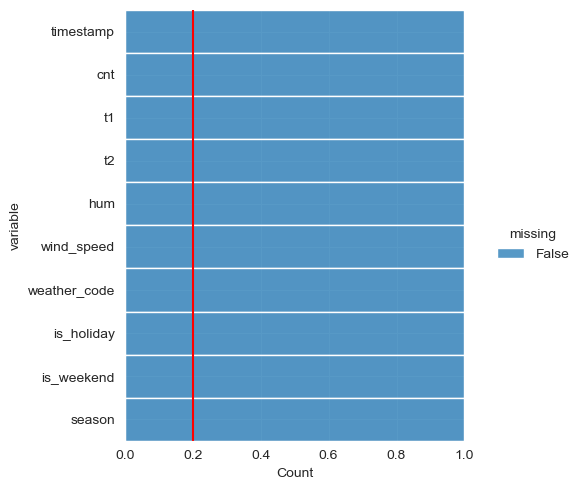

In [ ]:
plt.figure(figsize = (10, 5))

sns.displot(
            data = df.isnull().melt(value_name="missing"),
            y = "variable",
            hue = "missing",
            multiple = "fill",
            height = 5)

plt.axvline(0.2, color = "r")  ##draws the red line
plt.show()

In [ ]:
df.isnull()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17409,False,False,False,False,False,False,False,False,False,False
17410,False,False,False,False,False,False,False,False,False,False
17411,False,False,False,False,False,False,False,False,False,False
17412,False,False,False,False,False,False,False,False,False,False


In [3]:
df.isnull().melt(value_name = "missing")

,variable,missing
0,timestamp,False
1,timestamp,False
2,timestamp,False
3,timestamp,False
4,timestamp,False
...,...,...
174135,season,False
174136,season,False
174137,season,False
174138,season,False


<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>

**season**

In [ ]:
season = df['season'].value_counts()
season

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [ ]:
print("Spring months :", df[df["season"]==0]["timestamp"].str[5:7].unique())
print("Summer months :", df[df["season"]==1]["timestamp"].str[5:7].unique())
print("Fall months   :", df[df["season"]==2]["timestamp"].str[5:7].unique())
print("Winter months :", df[df["season"]==3]["timestamp"].str[5:7].unique())

Spring months : ['03' '04' '05']
Summer months : ['06' '07' '08']
Fall months   : ['09' '10' '11']
Winter months : ['01' '02' '12']


In [5]:
season_index = df['season'].value_counts().index
season_index

Float64Index([0.0, 1.0, 3.0, 2.0], dtype='float64')

In [6]:
season_values = df['season'].value_counts().values
season_values

array([4394, 4387, 4330, 4303])

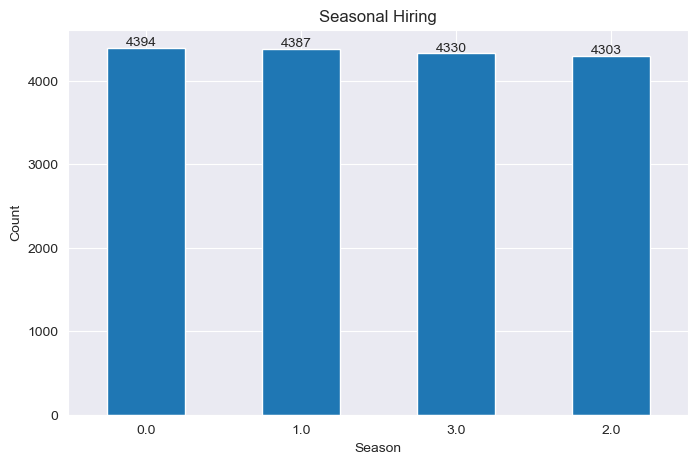

In [19]:

plt.figure(figsize=(8,5))

ax = df['season'].value_counts().plot(kind = "bar", x = season_index, y = season_values)

plt.xticks(rotation=0)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Seasonal Hiring")

#matplotlib

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+30))

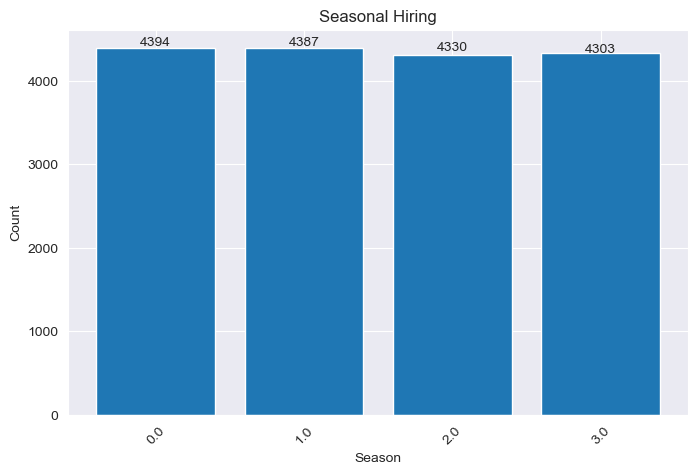

In [ ]:
plt.figure(figsize=(8,5))

plt.bar(x = season_index, 
        height = season_values, 
        tick_label = season_index)


plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Seasonal Hiring")

for index, value in enumerate(season_values):
    plt.text(index, value, str(value), va = "bottom", ha = "center");

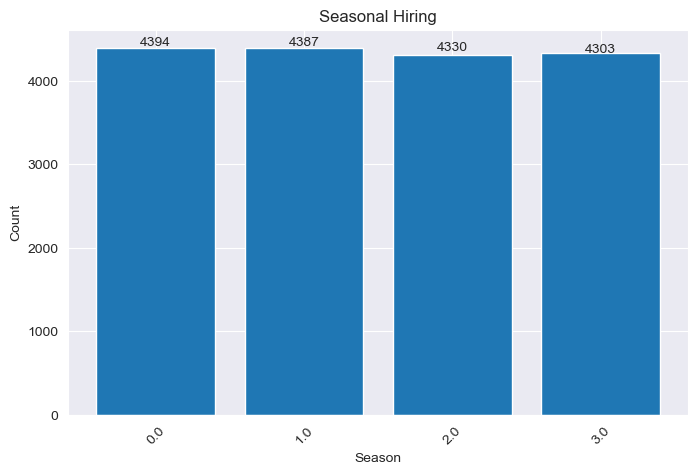

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x = season_index, 
       height = season_values, 
       tick_label = season_index)

ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel("Season")
ax.set_ylabel("Count")
ax.set_title("Seasonal Hiring")


for index, value in enumerate(season_values):
    ax.text(index, value, str(value), va = "bottom", ha = "center");

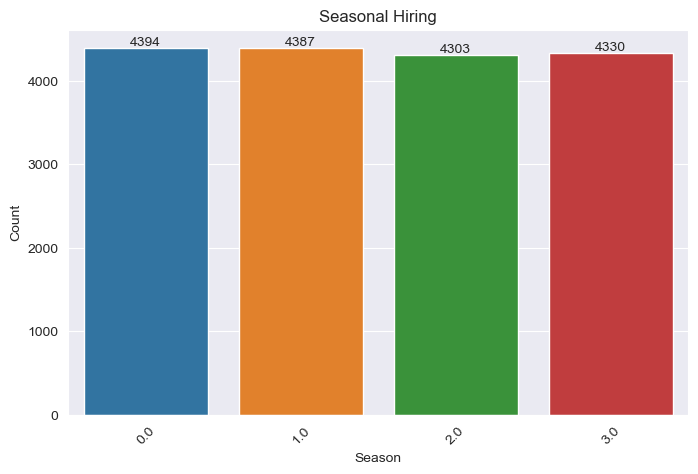

In [ ]:
#Seaborn

plt.figure(figsize=(8, 5))

ax = sns.barplot(x = season_index, 
                 y = season_values)

plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Seasonal Hiring")

for container in ax.containers:
    ax.bar_label(container)

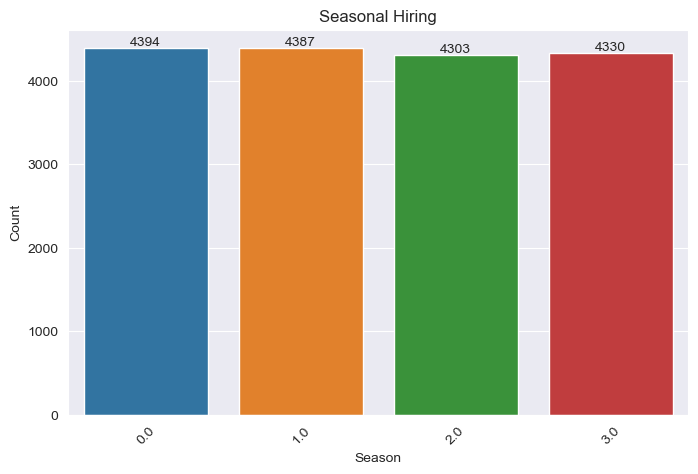

In [ ]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='season', 
                   data=df)


plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Seasonal Hiring")

for container in ax.containers:
    ax.bar_label(container)

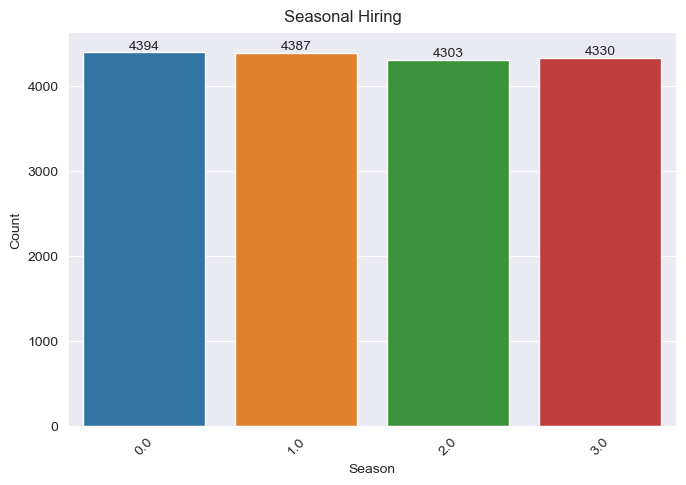

In [ ]:
g = sns.catplot(x='season', 
                data=df, 
                kind='count', 
                height=4.8, 
                aspect=1.45)

g.fig.subplots_adjust(top=0.93)

g.set_xticklabels(rotation=45)     
g.set_xlabels('Season')
g.set_ylabels('Count')
g.fig.suptitle("Seasonal Hiring")

for container in g.ax.containers:
    g.ax.bar_label(container)


**IS_HOLIDAY**

In [ ]:
is_holiday = df.is_holiday.value_counts()
is_holiday_index = df.is_holiday.value_counts().index
is_holiday_values = df.is_holiday.value_counts().values

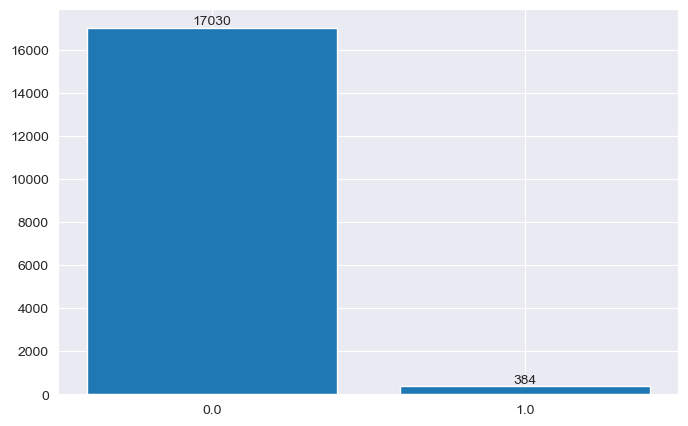

In [ ]:

plt.figure(figsize = (8,5))

plt.bar(x = is_holiday_index, 
        height = is_holiday_values, 
        tick_label = is_holiday.index)

for index, value in enumerate(is_holiday.values):
    plt.text(index, value, str(value), va = "bottom", ha = "center")

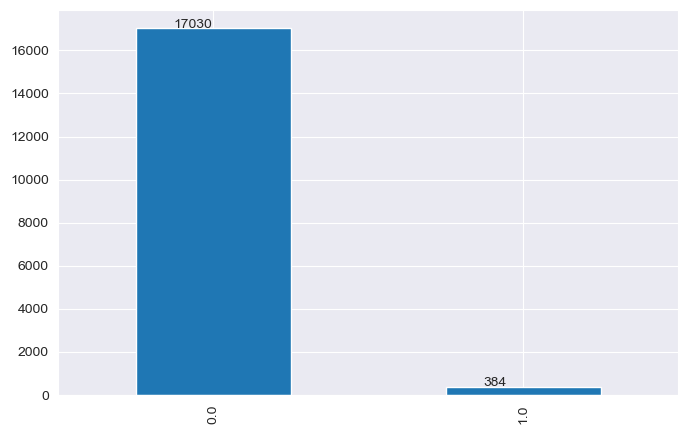

In [ ]:
plt.figure(figsize = (8,5))

ax = df['is_holiday'].value_counts().plot(kind = "bar", 
                                          x = is_holiday_index, 
                                          y = is_holiday_values)

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+30))

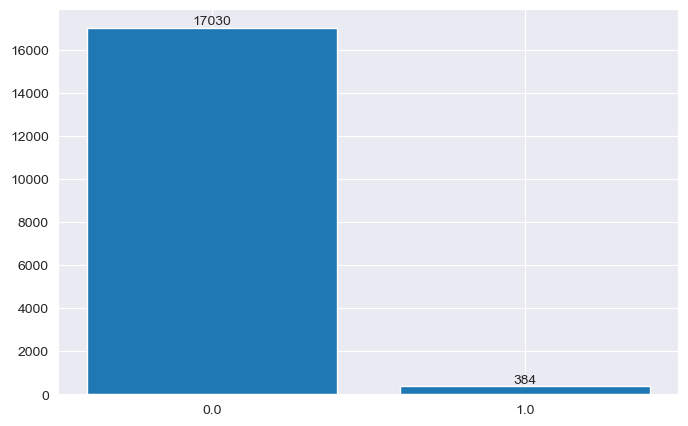

In [ ]:

fig, ax = plt.subplots(figsize = (8,5))

ax.bar(is_holiday_index, 
       is_holiday_values, 
       tick_label = is_holiday.index)

for container in ax.containers:
    ax.bar_label(container);

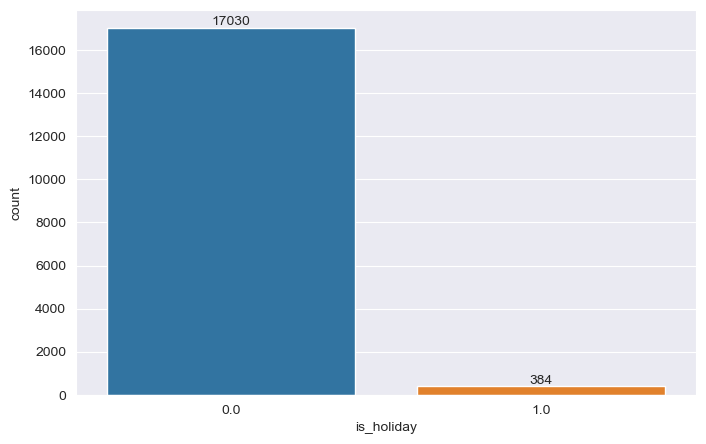

In [ ]:
plt.figure(figsize = (8, 5))

ax = sns.countplot(x = 'is_holiday', 
                   data = df)

ax.bar_label(ax.containers[0], fmt = '%d');

**IS_WEEKEND**

In [ ]:
is_weekend = df.is_weekend.value_counts()
is_weekend_index = df.is_weekend.value_counts().index
is_weekend_values = df.is_weekend.value_counts().values

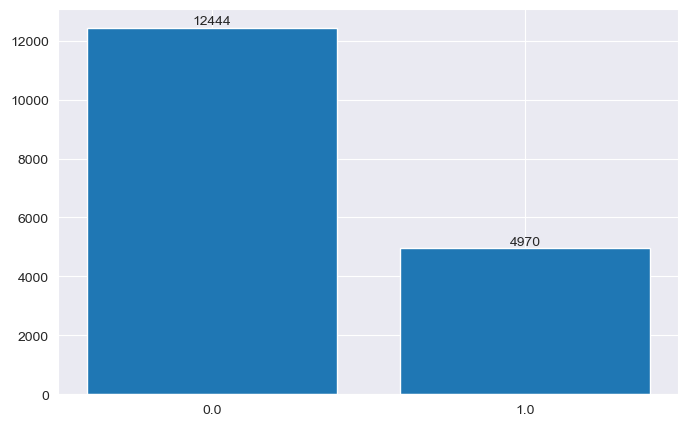

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))

ax.bar(is_weekend_index, 
       is_weekend_values, 
       tick_label = is_weekend.index)

for container in ax.containers:
    ax.bar_label(container);

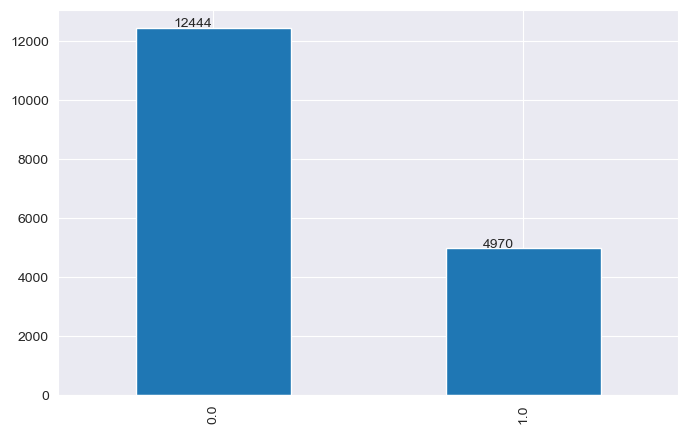

In [ ]:
plt.figure(figsize = (8,5))

ax = df['is_weekend'].value_counts().plot(kind = "bar", 
                                          x = is_weekend_index, 
                                          y = is_weekend_values)

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+30))

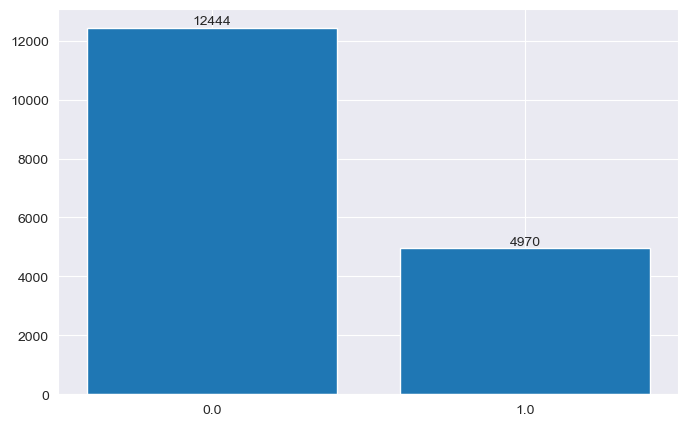

In [ ]:
plt.figure(figsize = (8,5))

plt.bar(x = is_weekend_index, 
        height = is_weekend_values, 
        tick_label = is_weekend.index)

for index, value in enumerate(is_weekend_values):
    plt.text(index, value, str(value), va = "bottom", ha = "center");

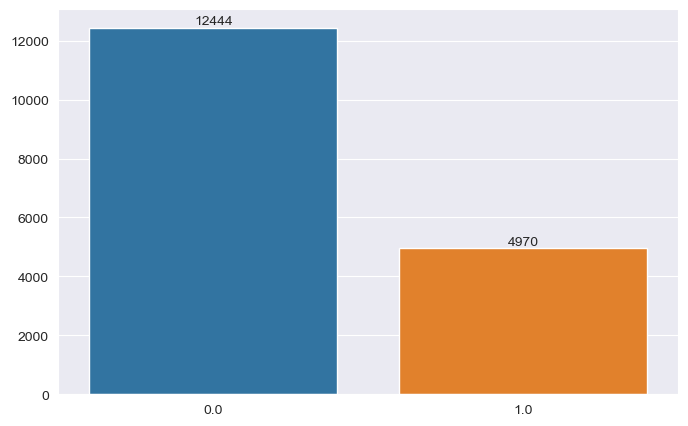

In [ ]:
plt.figure(figsize = (8, 5))

ax = sns.barplot(x = is_weekend_index, 
                 y = is_weekend_values);

for container in ax.containers:
    ax.bar_label(container)

**WEATHER_CODE**

In [ ]:
weather_code = df.weather_code.value_counts()
weather_code_index = df.weather_code.value_counts().index
weather_code_values = df.weather_code.value_counts().values

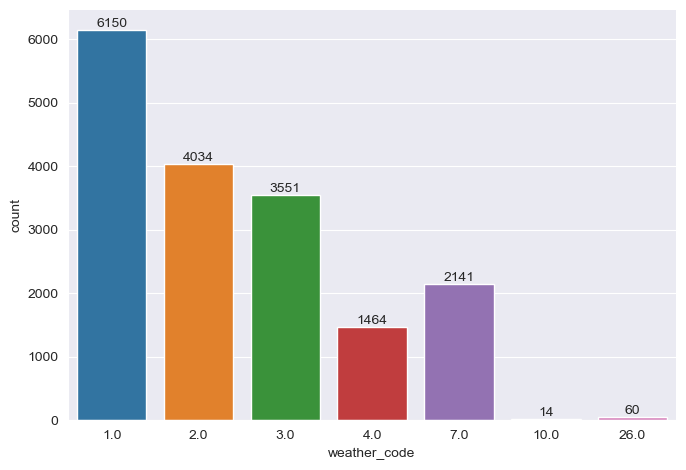

In [ ]:
g = sns.catplot(x='weather_code', 
                data=df, 
                kind='count', 
                height=4.8, 
                aspect=1.45)

for container in g.ax.containers:
    g.ax.bar_label(container)

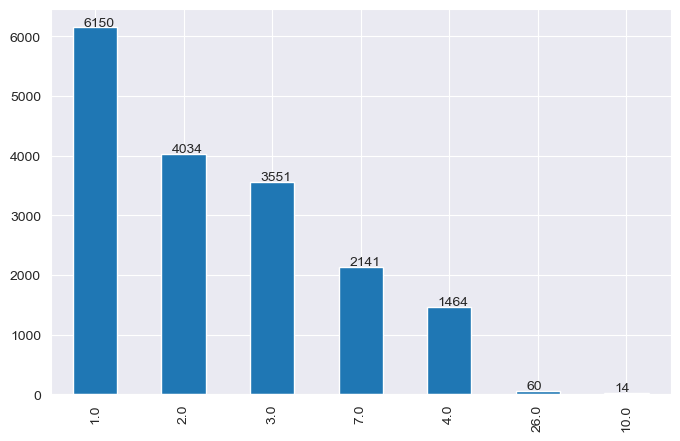

In [ ]:
plt.figure(figsize = (8,5))

ax = df['weather_code'].value_counts().plot(kind = "bar")

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+30))

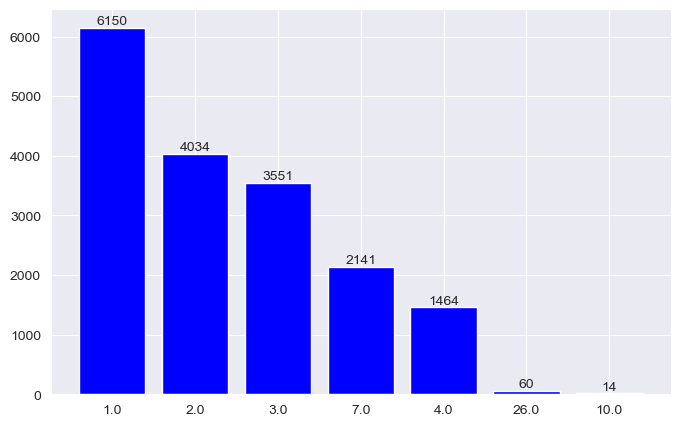

In [ ]:
keys = df.weather_code.value_counts().index
values = df.weather_code.value_counts().values


x = range(len(keys))

fig, ax = plt.subplots(figsize = (8,5))
ax.bar(x, values, 0.8, color = 'b', align = 'center')          
ax.set_xticks(x)
ax.set_xticklabels(keys);

for container in ax.containers:
    ax.bar_label(container);

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
type(df['timestamp'][0])

str

In [ ]:
df.timestamp = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [ ]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


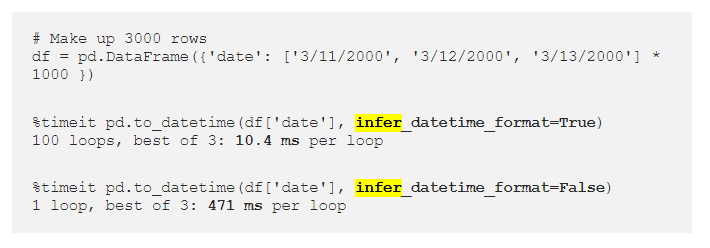

In [ ]:
df.set_index('timestamp', inplace=True)

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [ ]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [ ]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

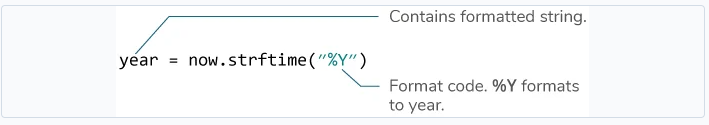

In [ ]:
f = lambda x: x.strftime('%Y-%m') 

df['year_month'] = f(df.index)
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [ ]:
df.year.unique()

array([2015, 2016, 2017])

In [ ]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
np.sort(df.day_of_month.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
np.sort(df.day_of_week.unique())

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
df.day_of_week.value_counts()

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: day_of_week, dtype: int64

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

In [ ]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,-0.068688,0.324423
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,-0.002317,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,-0.006824,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,0.011556,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.001708,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,0.020619,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.144628,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.791975,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.002356,0.000006
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,-0.002876,0.000542


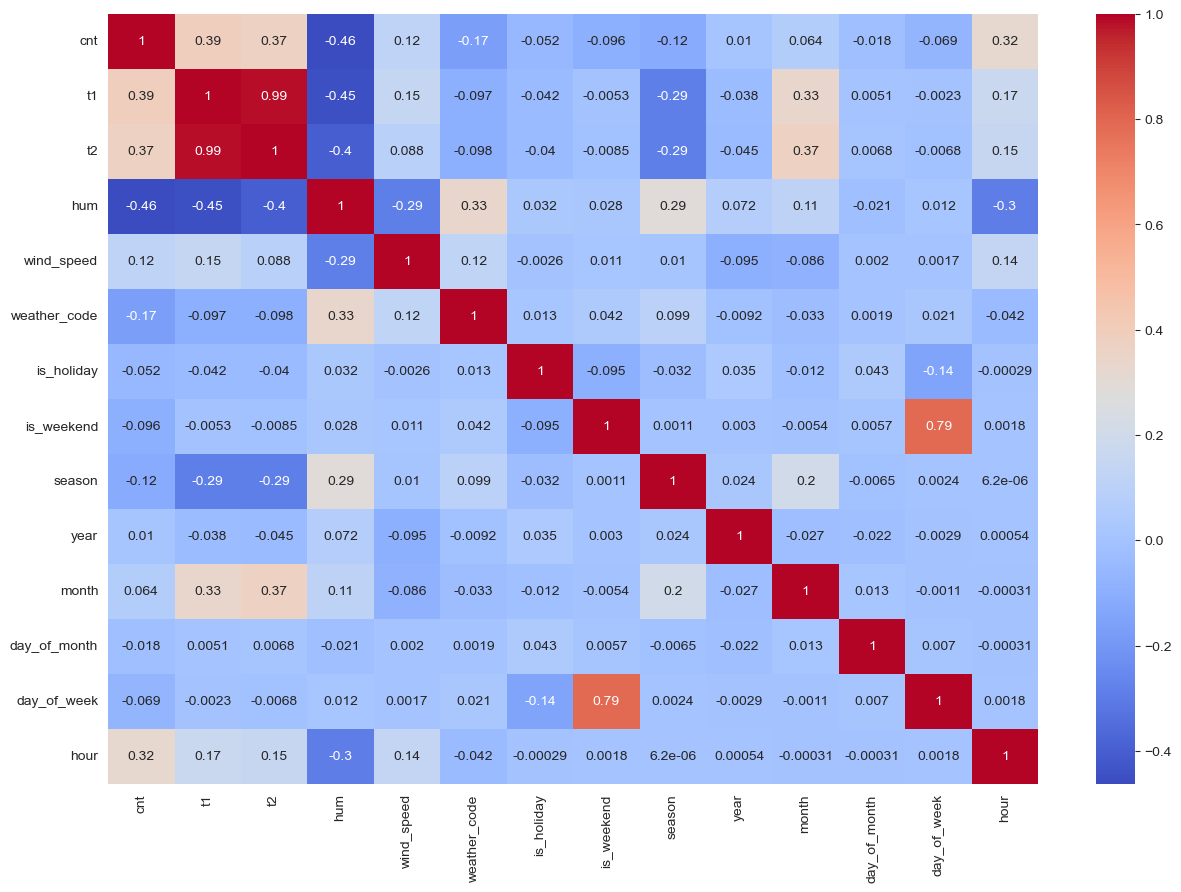

In [ ]:

plt.figure(figsize = (15, 10))

sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "coolwarm");

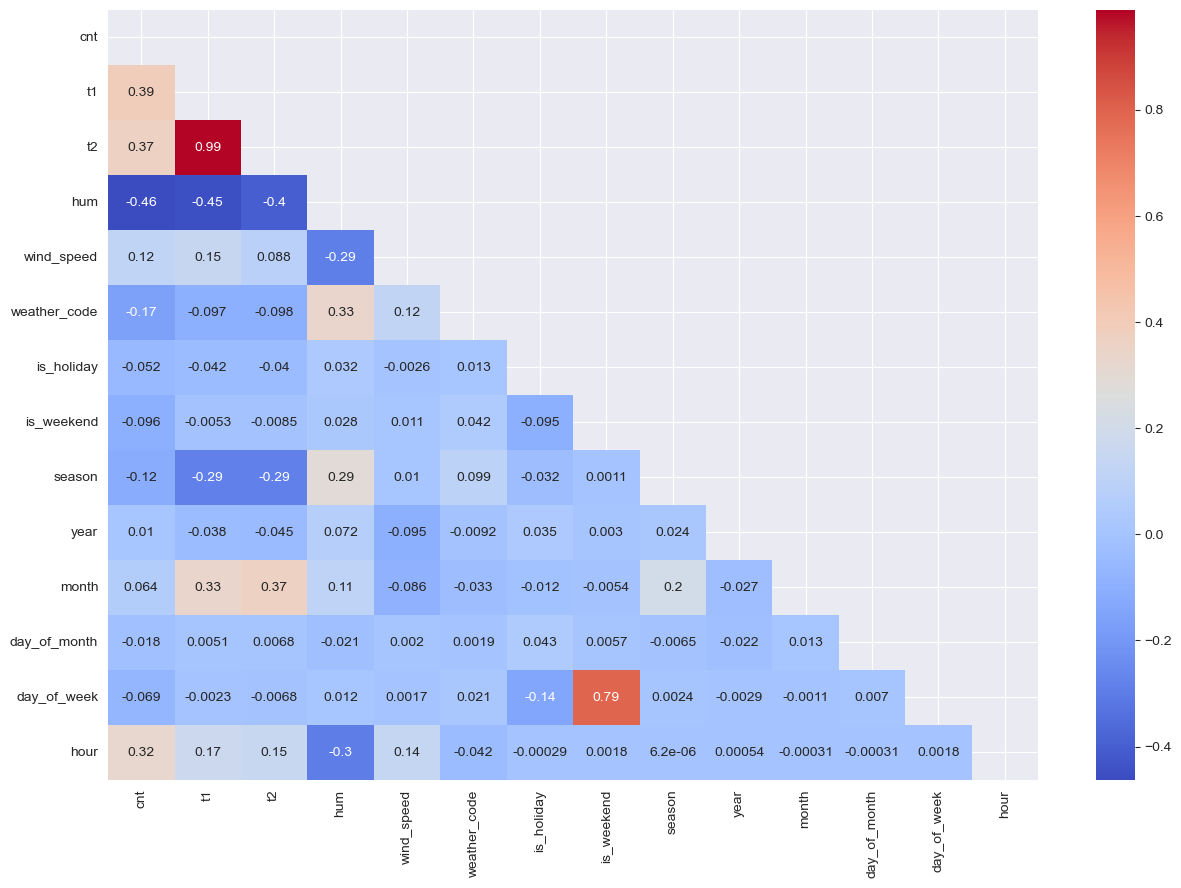

In [ ]:

plt.figure(figsize = (15, 10))

matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = "coolwarm", 
            mask = matrix);

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

![Screenshot%202021-10-27%20170237.png](attachment:Screenshot%202021-10-27%20170237.png)

In [ ]:
df.corr().iloc[:,0]

cnt             1.000000
t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
weather_code   -0.166633
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
year            0.010046
month           0.063757
day_of_month   -0.017887
day_of_week    -0.068688
hour            0.324423
Name: cnt, dtype: float64

In [ ]:
df_corr_cnt = df.corr()[['cnt']].sort_values(by = 'cnt', ascending=False)
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


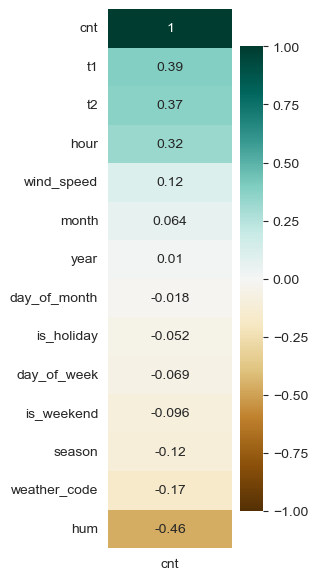

In [ ]:

plt.figure(figsize = (2, 7))

sns.heatmap(df_corr_cnt, 
            vmin = -1, 
            vmax = 1, 
            annot = True, 
            cmap = 'BrBG');

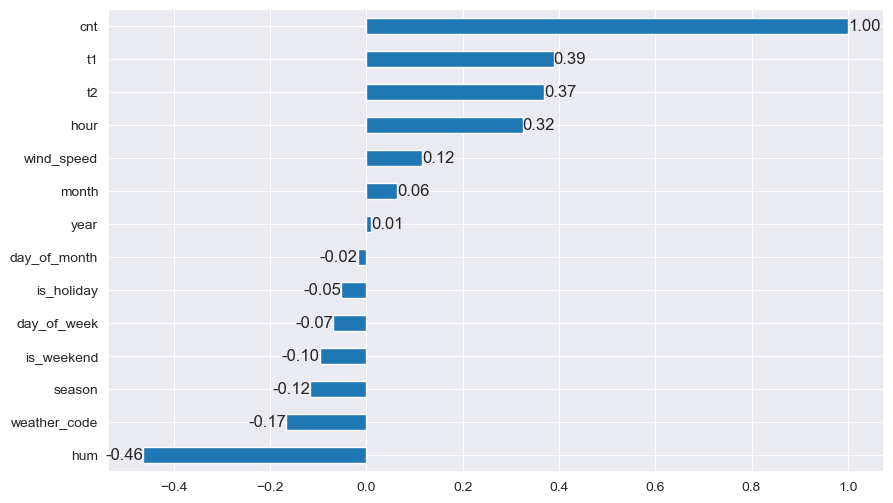

In [ ]:
plt.figure(figsize = (10, 6))

ax = df.corr()["cnt"].sort_values().plot.barh()

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize = 12)

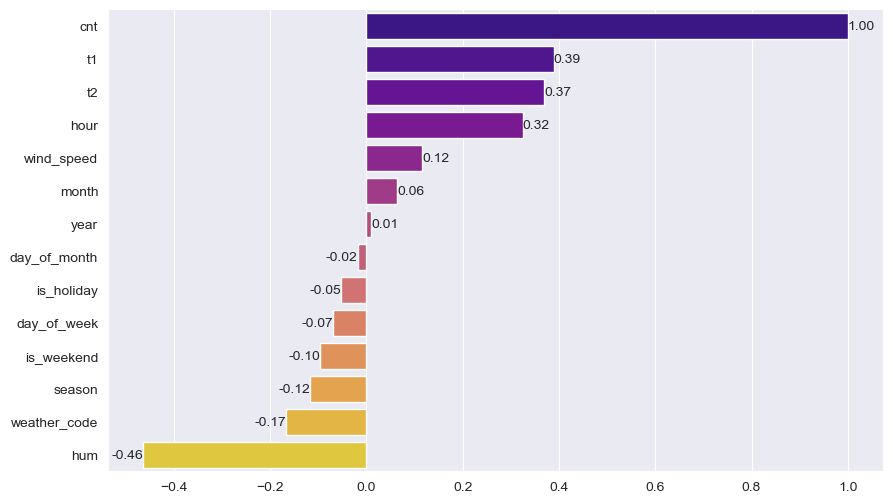

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x = df.corr().iloc[:,0].sort_values(ascending = False).values,
                 y = df.corr().iloc[:,0].sort_values(ascending = False).index,
                 palette = "plasma")

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f")

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

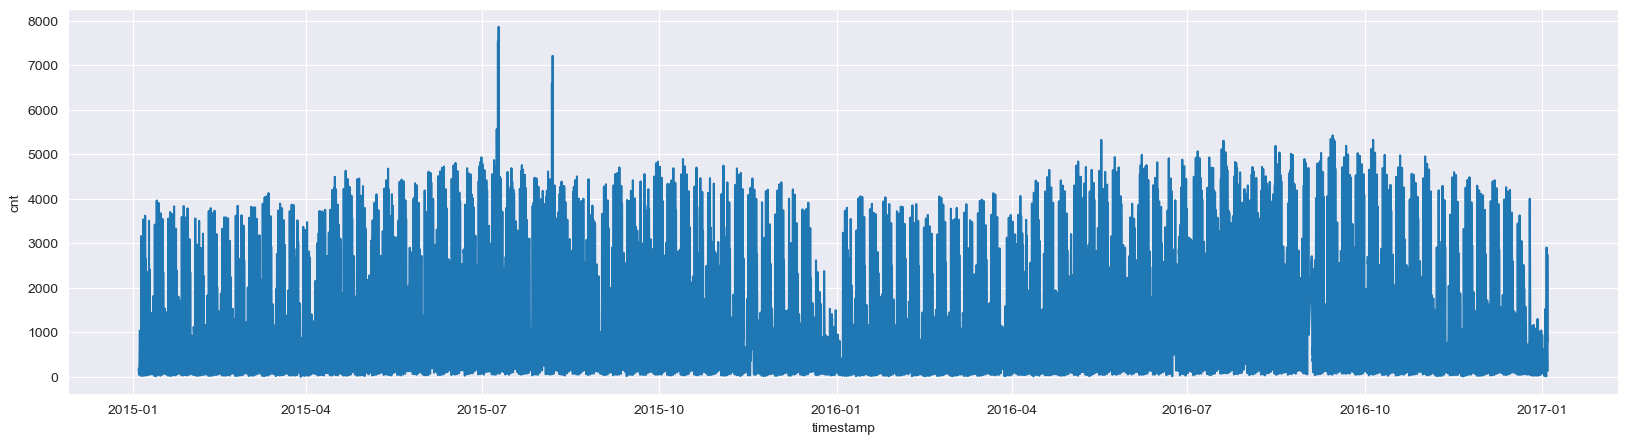

In [ ]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = df.index, 
             y = 'cnt', 
             data = df)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [ ]:
df_sum = pd.DataFrame(df.groupby("year_month")["cnt"].sum())
df_sum

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


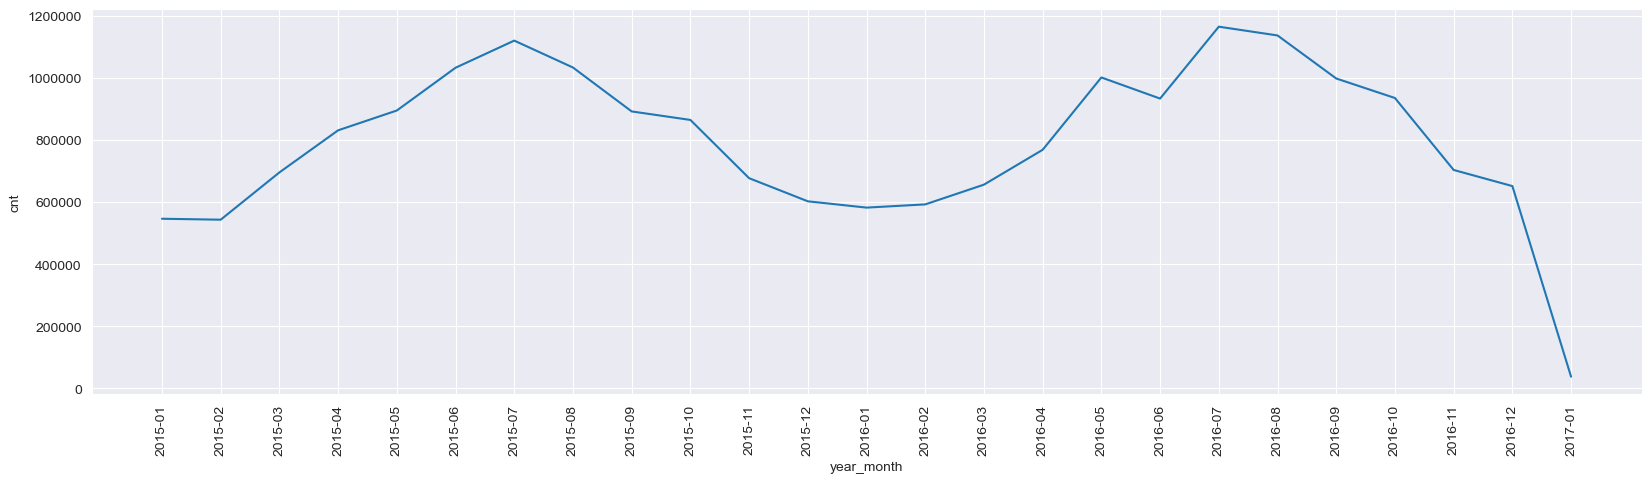

In [ ]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = 'year_month', 
             y = 'cnt', 
             data = df_sum)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 90);

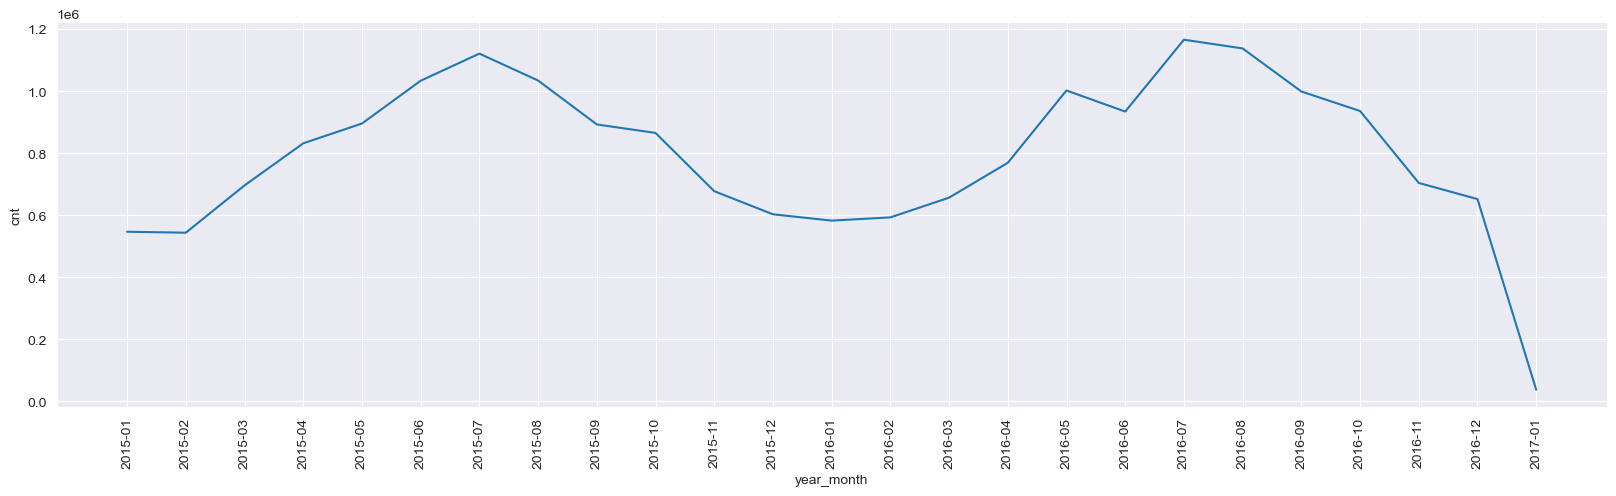

In [ ]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df, 
             x = "year_month", 
             y = "cnt", 
             estimator = 'sum', 
             ci = None)
plt.xticks(rotation = 90)

plt.show()

In [ ]:
df.groupby("year_month")["cnt"].mean()

year_month
2015-01     814.663189
2015-02     810.125186
2015-03     941.723951
2015-04    1156.581363
2015-05    1203.512097
2015-06    1441.076709
2015-07    1514.441892
2015-08    1389.719086
2015-09    1255.243319
2015-10    1175.334239
2015-11     952.646976
2015-12     814.645946
2016-01     782.954301
2016-02     861.787791
2016-03     900.585734
2016-04    1069.325452
2016-05    1346.686828
2016-06    1324.649645
2016-07    1572.910931
2016-08    1536.910811
2016-09    1462.106881
2016-10    1259.362046
2016-11     978.941586
2016-12     876.220430
2017-01     523.333333
Name: cnt, dtype: float64

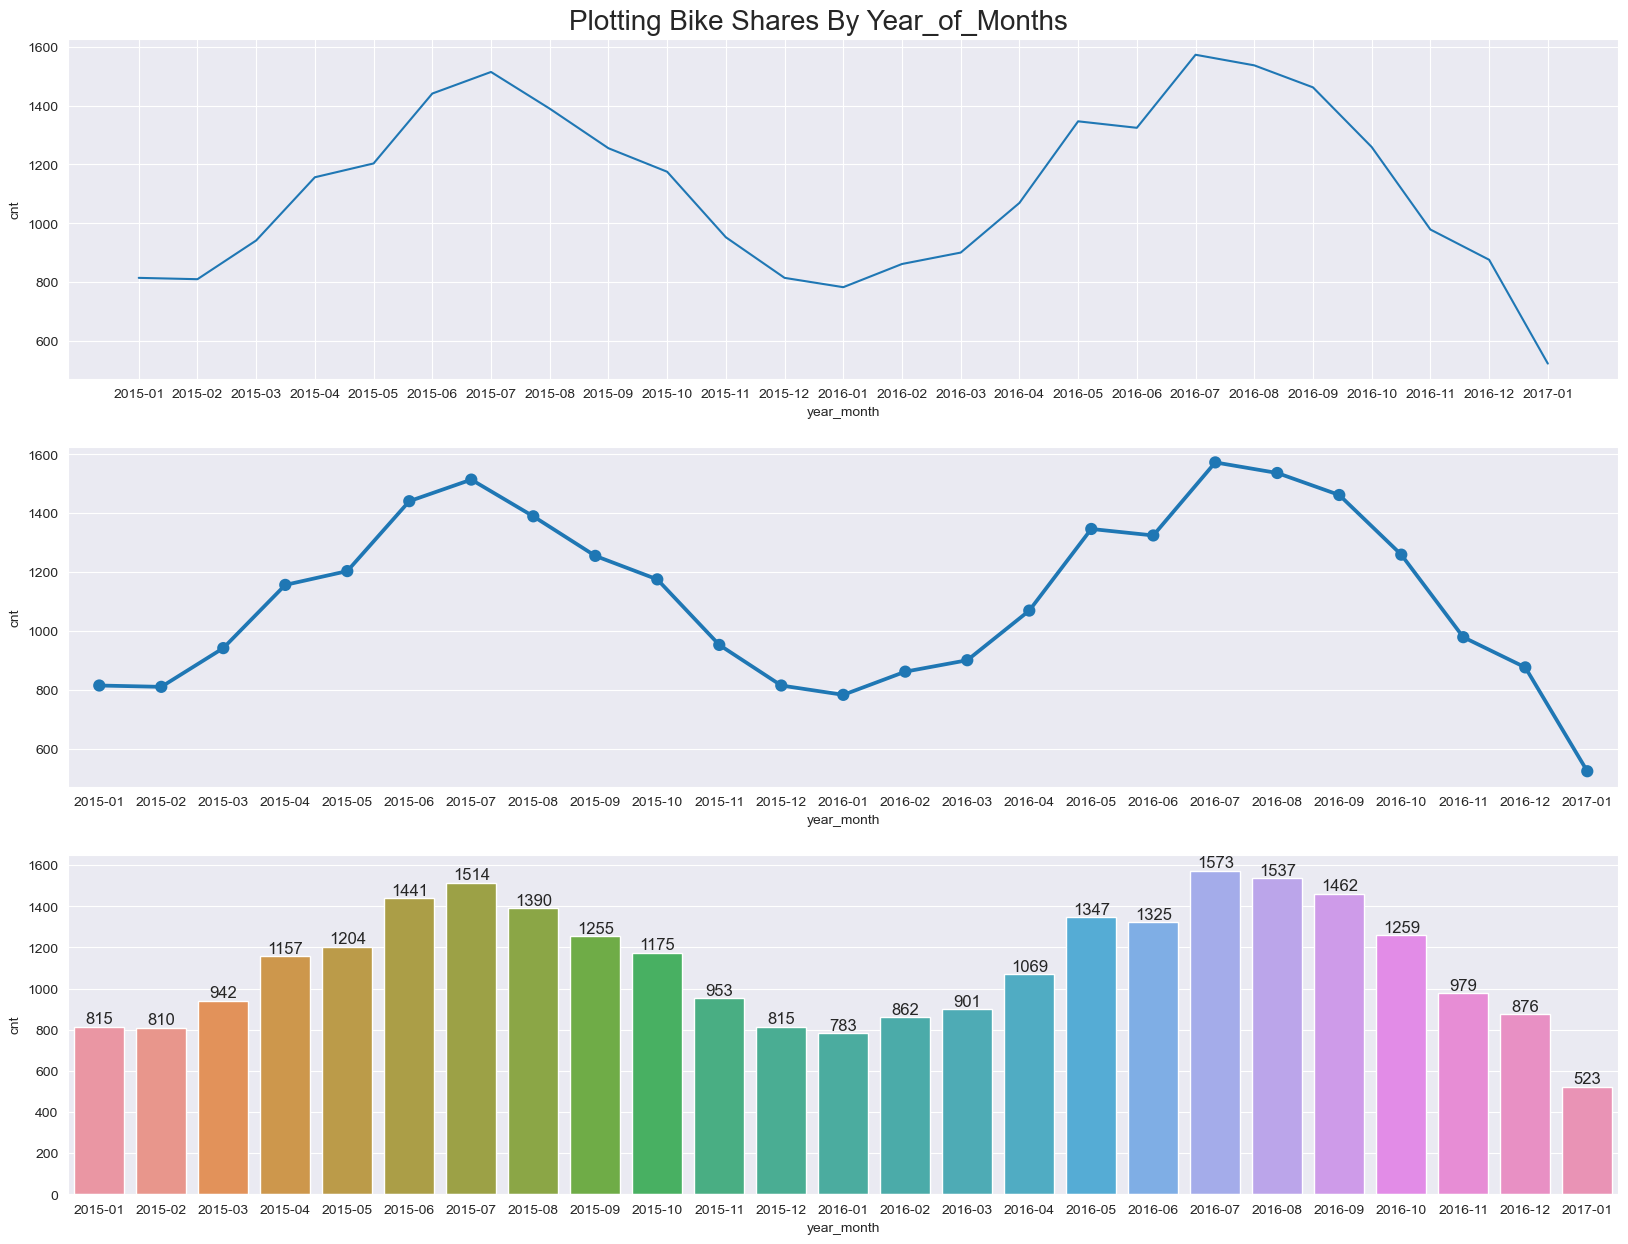

In [ ]:
fig, ax = plt.subplots(nrows= 3, ncols = 1, figsize = (20,15))

fig.suptitle("Plotting Bike Shares By Year_of_Months", y = 0.9, fontsize = 20)

sns.lineplot(x = df.year_month, y = df.cnt, ax = ax[0], ci = None)

sns.pointplot(x = df.year_month, y = df.cnt, ax = ax[1], ci = None)

sns.barplot(x = df.year_month, y = df.cnt, ax = ax[2], ci = None)
for container in ax[2].containers:
    ax[2].bar_label(container, fmt = "%.0f", fontsize = 12);

In [ ]:
df.groupby("month")["cnt"].mean()

month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

<div class="alert alert-warning alert-info">
<span style=" color:red"> 11. Plot bike shares by day of month
</span>

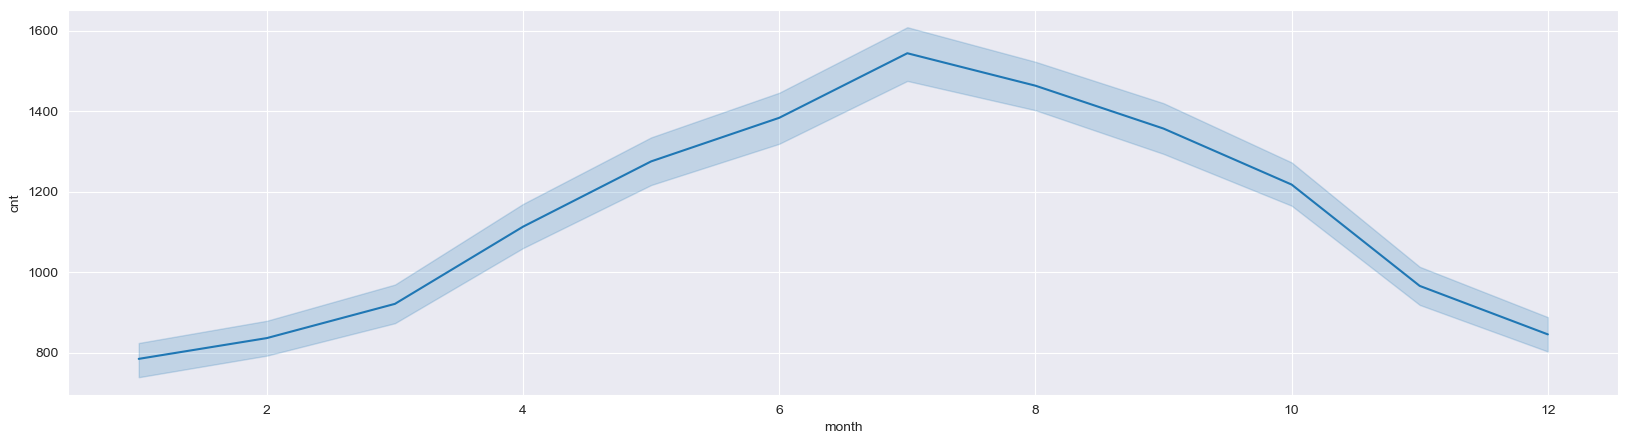

In [ ]:
plt.figure(figsize = (20,5))

sns.lineplot(x = 'month', 
             y = 'cnt', 
             data = df);

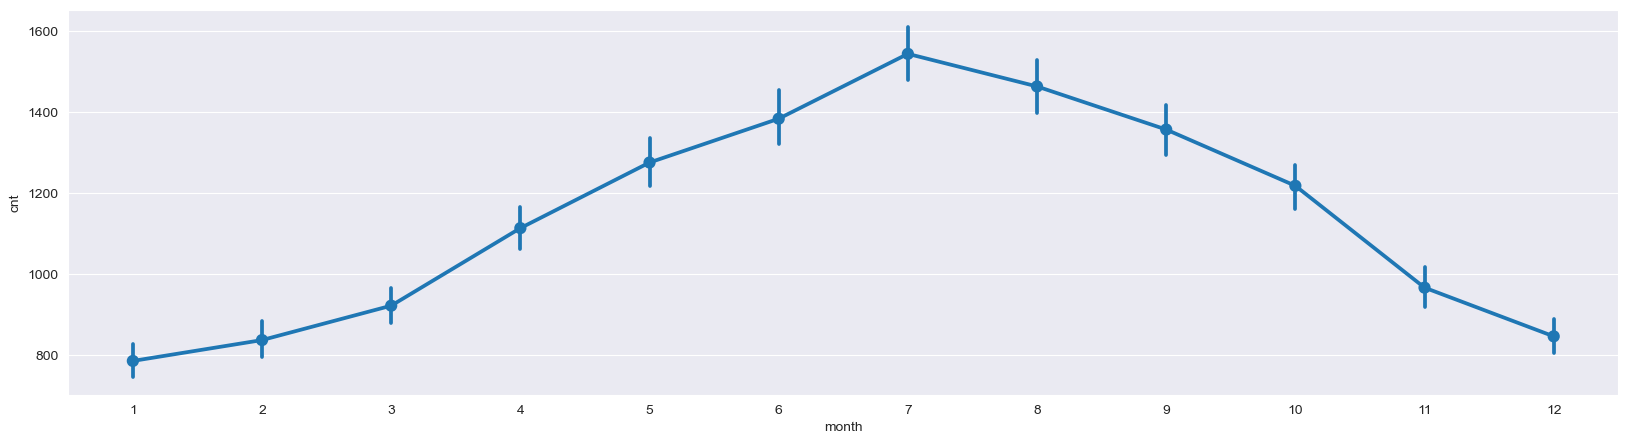

In [ ]:
plt.figure(figsize = (20,5))

sns.pointplot(x = "month", 
              y ="cnt", 
              data = df);

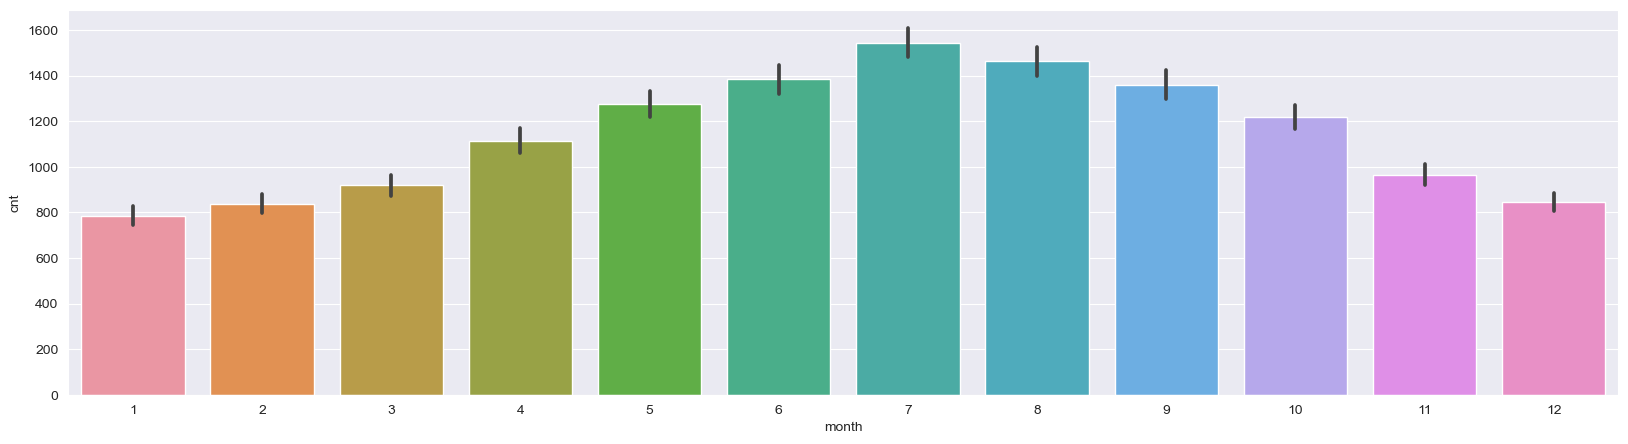

In [ ]:
plt.figure(figsize = (20,5))

sns.barplot(x = "month", 
            y = "cnt", 
            data = df);

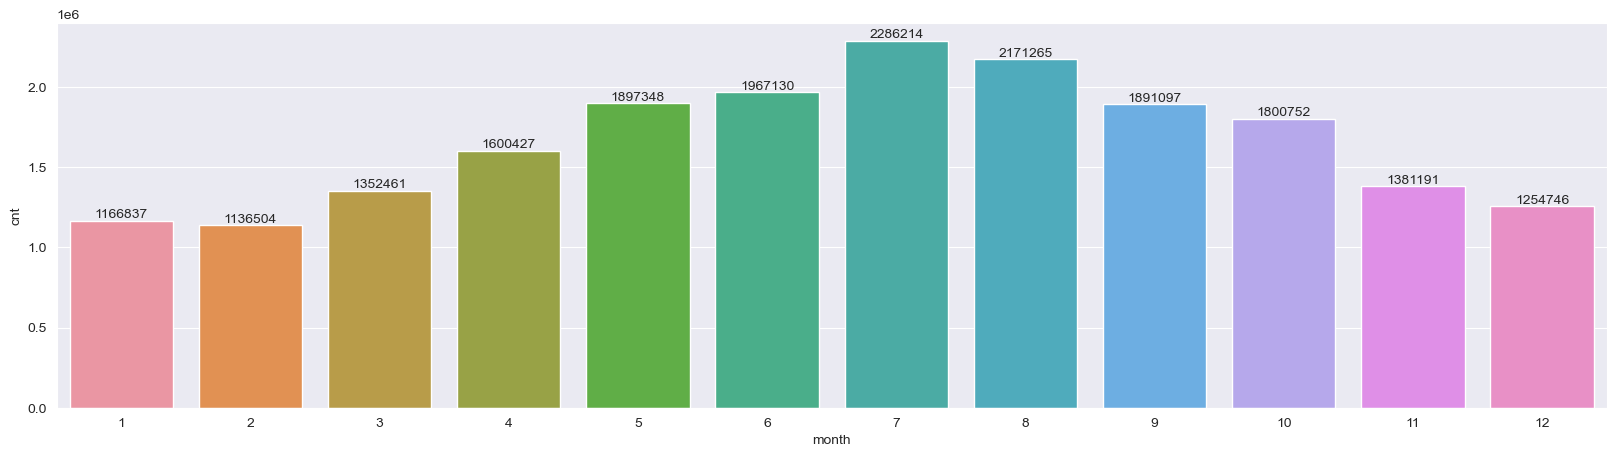

In [ ]:
plt.figure(figsize = (20,5))

chart = sns.barplot(x = "month", 
                    y = "cnt", 
                    data = df, 
                    estimator = sum, 
                    ci = None)

chart.bar_label(chart.containers[0], fmt = '%d');

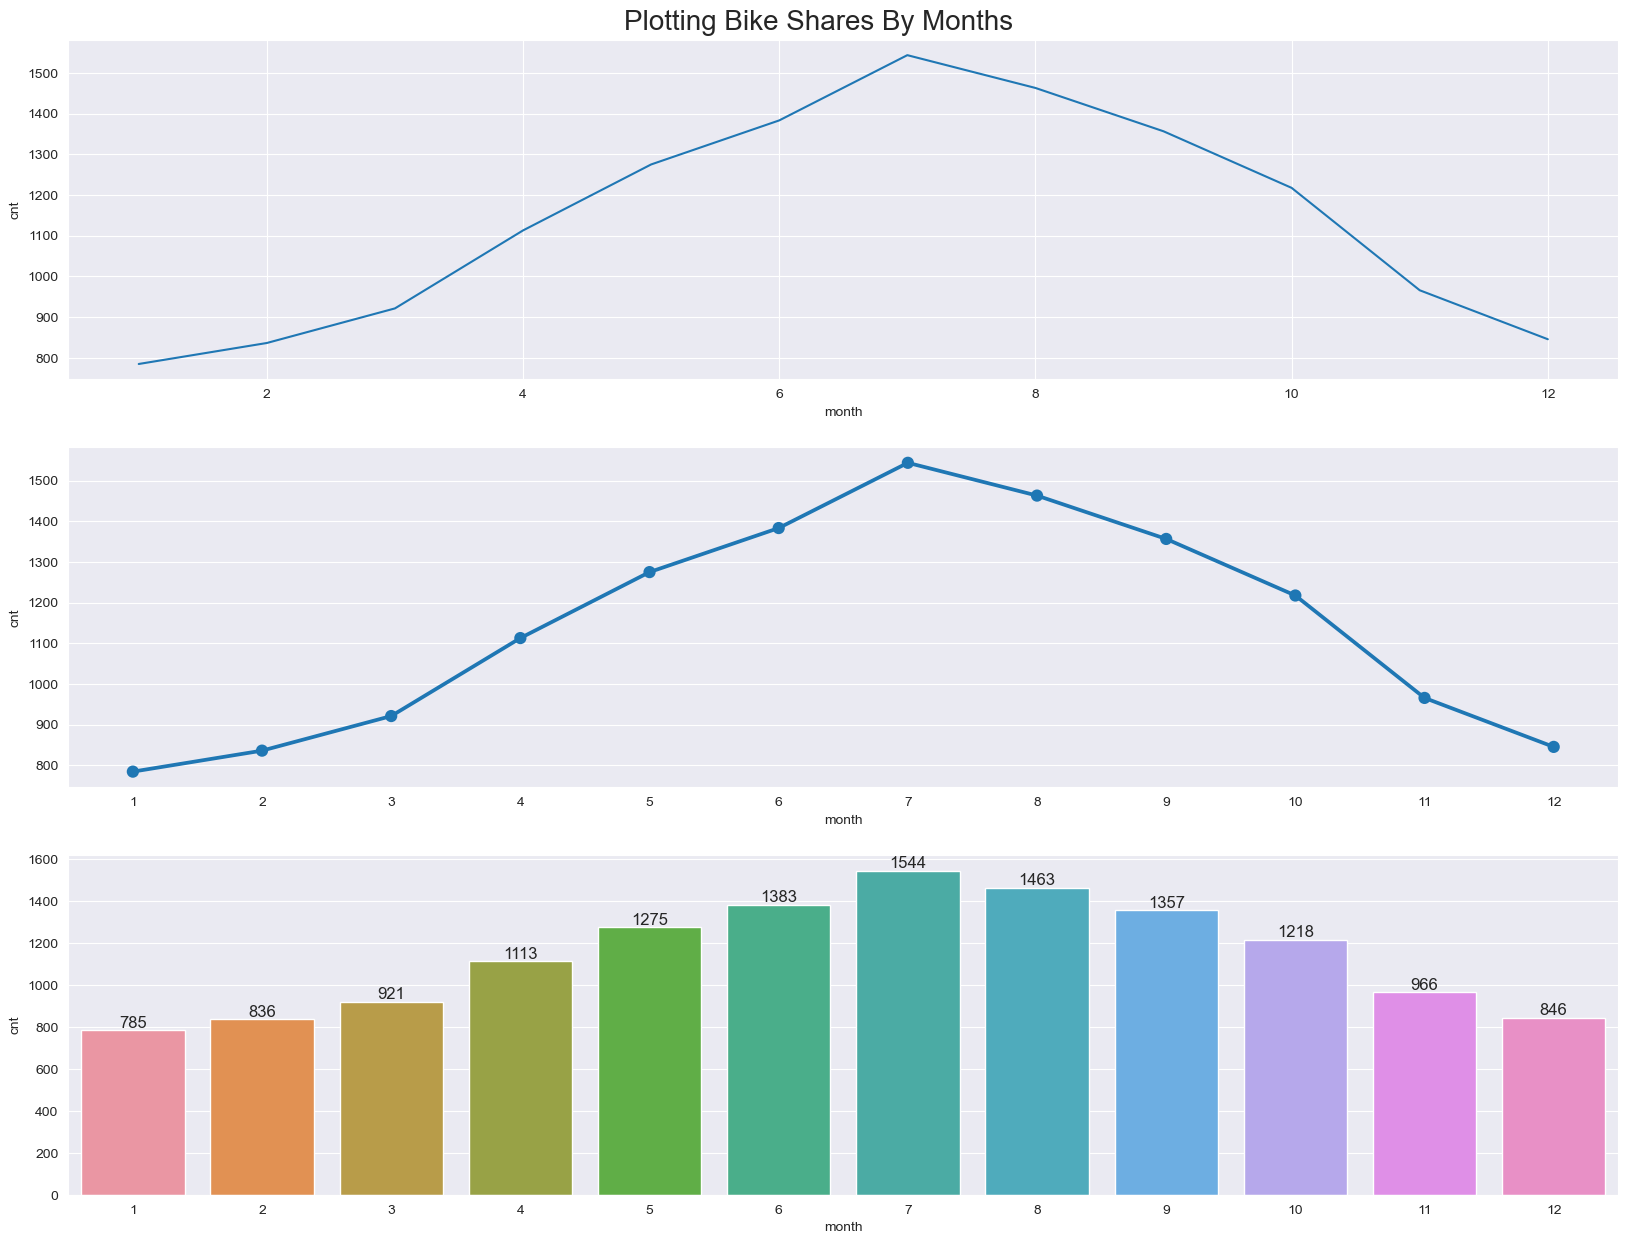

In [ ]:
fig = plt.figure(figsize = (20,15))

fig.suptitle("Plotting Bike Shares By Months", y = 0.9, fontsize = 20)

plt.subplot(3,1,1)
sns.lineplot(x = df.month, y = df.cnt, ci = None)

plt.subplot(3,1,2)
sns.pointplot(x = df.month, y = df.cnt, ci = None)

plt.subplot(3,1,3)
ax = sns.barplot(x = df.month, y = df.cnt, ci = None)
for container in ax.containers:
    ax.bar_label(container, fmt = "%.0f", fontsize = 12);

<div class="alert alert-warning alert-info">
<span style=" color:red">12. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [ ]:
df.groupby("hour")["cnt"].mean()

hour
0      290.609116
1      200.631215
2      136.303745
3       94.245492
4       73.313454
5      110.707351
6      466.626722
7     1468.745179
8     2882.823204
9     1653.019257
10    1064.660690
11    1151.218707
12    1433.717421
13    1505.739011
14    1472.004121
15    1564.621399
16    1869.801370
17    2829.585165
18    2629.043956
19    1651.510316
20    1059.781293
21     741.249311
22     592.409655
23     439.652355
Name: cnt, dtype: float64

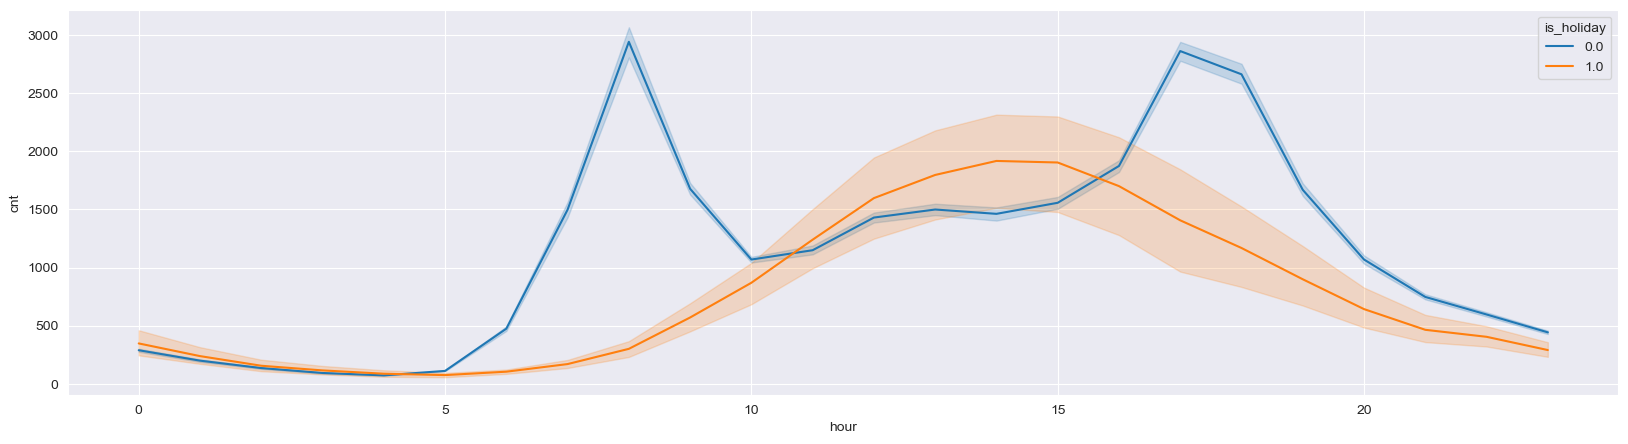

In [ ]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = 'hour', 
             y = 'cnt', 
             data = df, 
             hue = 'is_holiday');

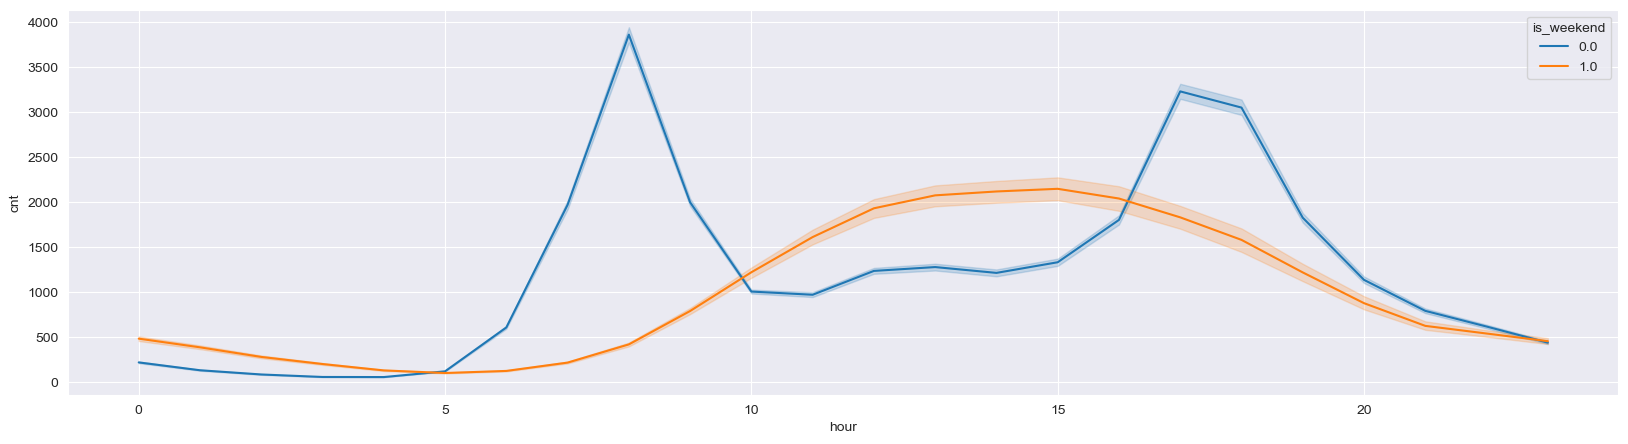

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = 'hour', 
             y = 'cnt', 
             data = df, 
             hue = 'is_weekend');

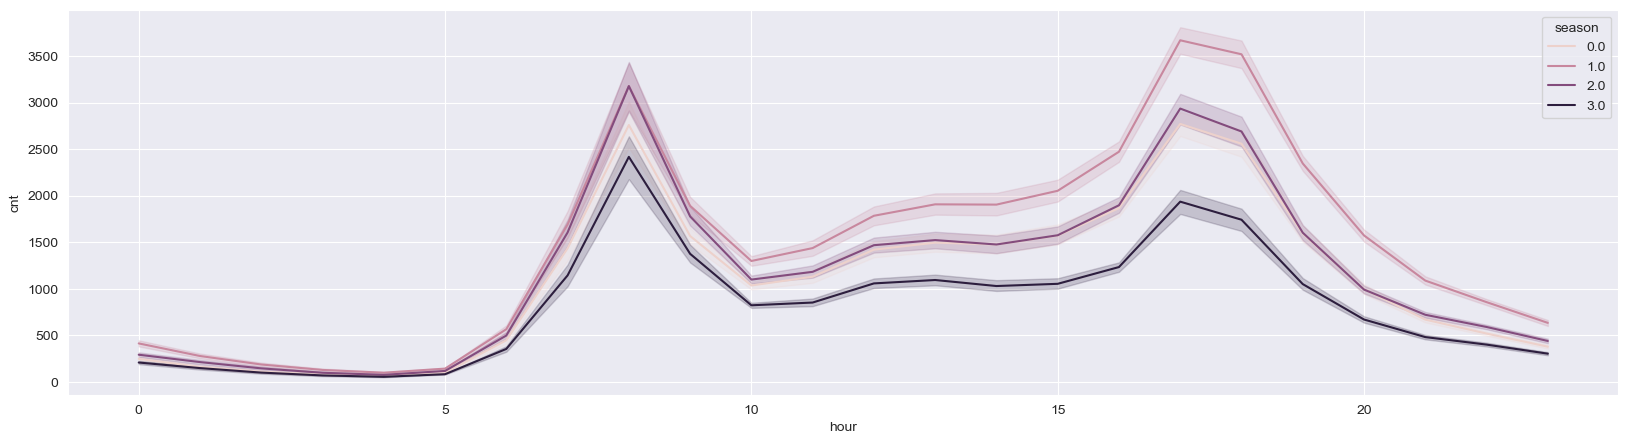

In [ ]:
plt.figure(figsize = (20, 5))

sns.lineplot(x = 'hour', 
             y = 'cnt', 
             data = df, 
             hue = 'season')
plt.show()

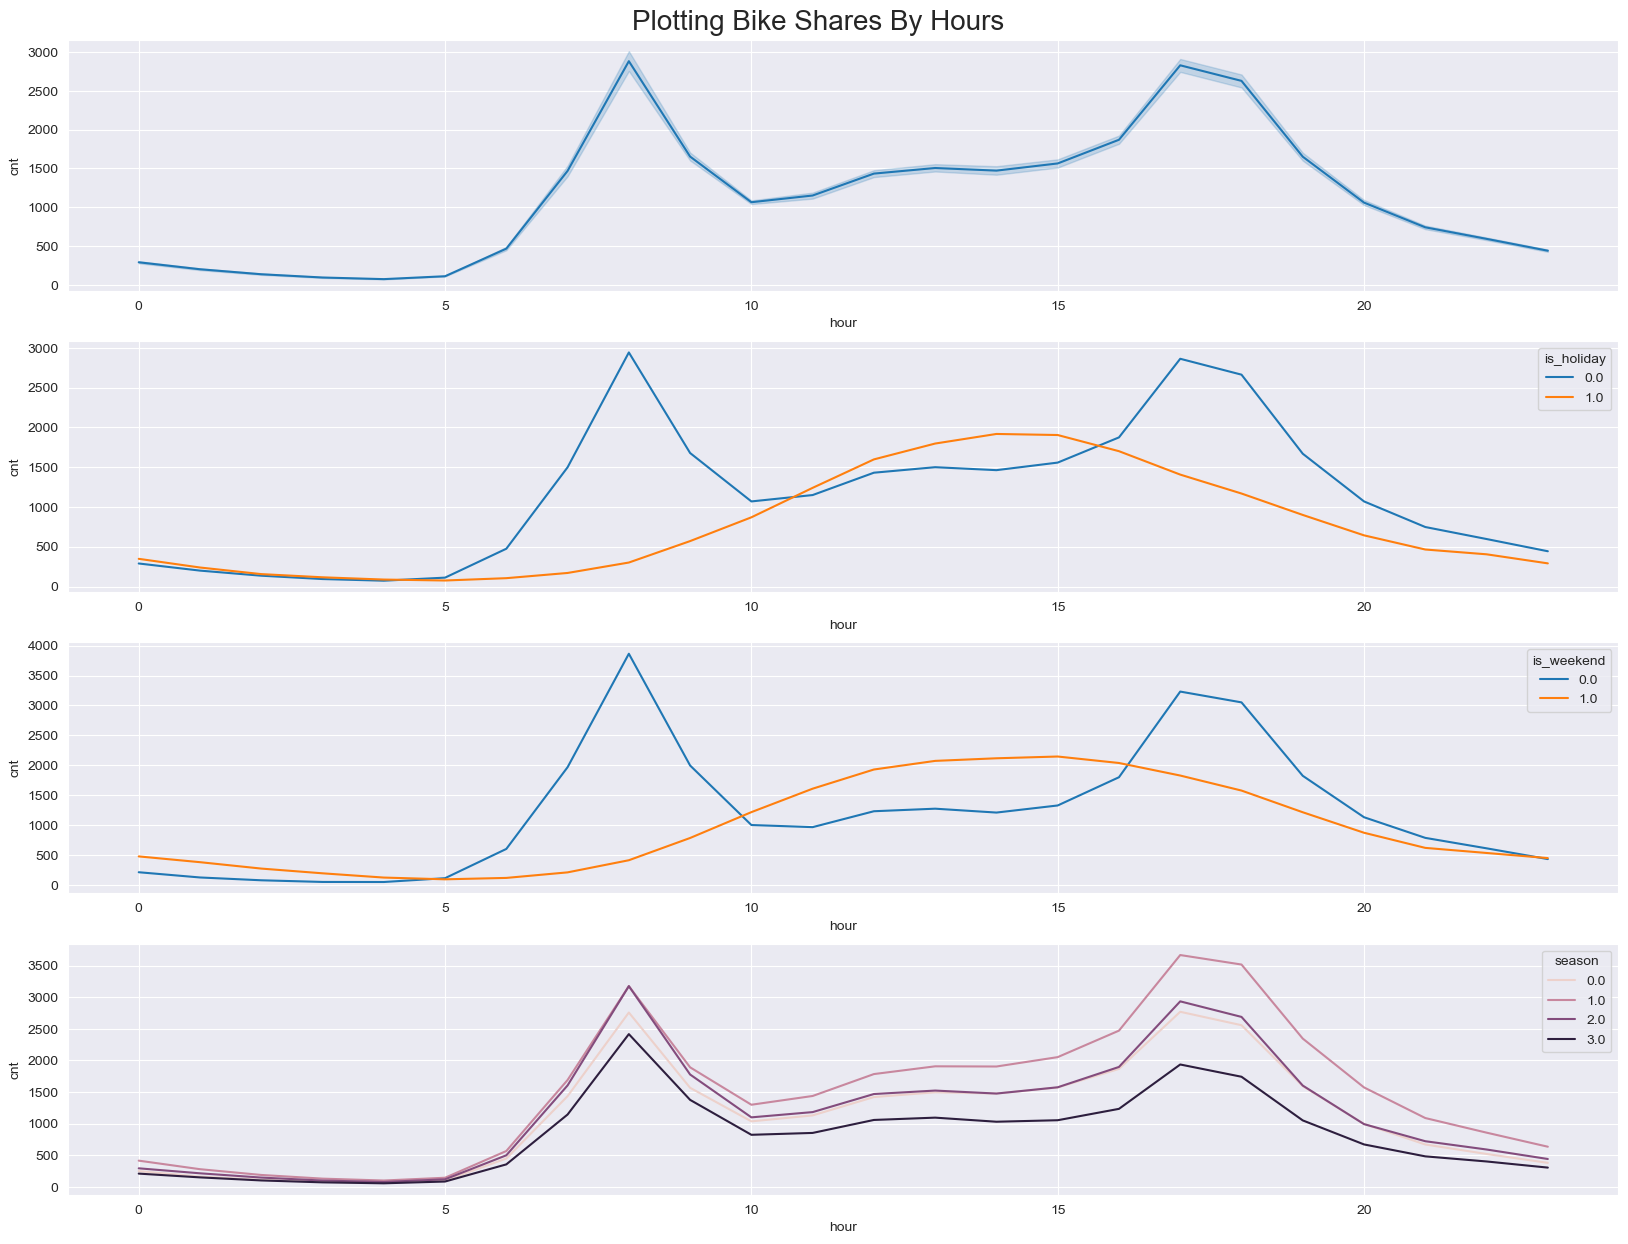

In [ ]:
fig = plt.figure(figsize = (20,15))

fig.suptitle("Plotting Bike Shares By Hours", y = 0.9, fontsize = 20)

plt.subplot(4,1,1)
sns.lineplot(x = df.hour, y = df.cnt)

plt.subplot(4,1,2)
sns.lineplot(x = df.hour, y = df.cnt, hue = df.is_holiday, ci = None)

plt.subplot(4,1,3)
sns.lineplot(x = df.hour, y = df.cnt, hue = df.is_weekend, ci = None)

plt.subplot(4,1,4)
sns.lineplot(x = df.hour, y = df.cnt, hue = df.season, ci = None);

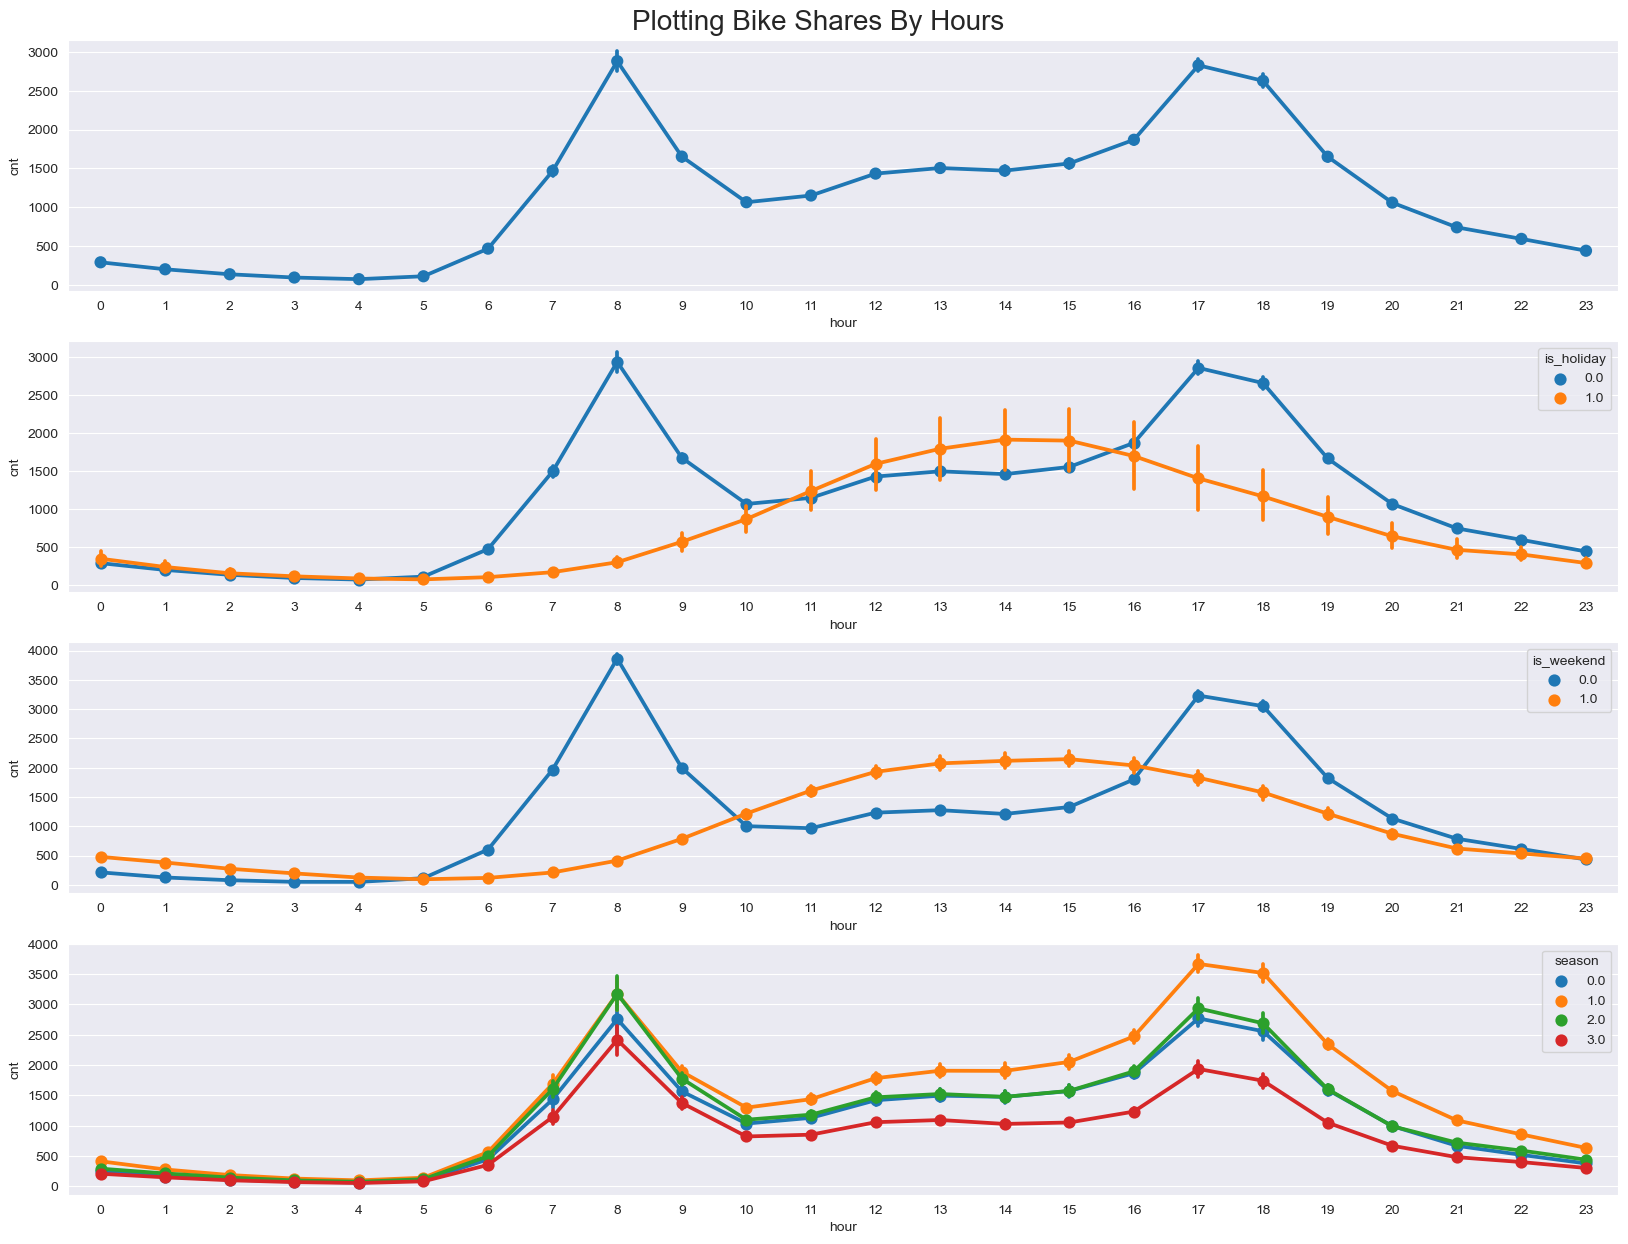

In [ ]:
fig, (ax1, ax2, ax3, ax4)  =  plt.subplots(nrows = 4, figsize = (20, 15))

fig.suptitle("Plotting Bike Shares By Hours", y = 0.9, fontsize = 20)

sns.pointplot(data = df, x = 'hour', y = 'cnt', ax = ax1)
sns.pointplot(data = df, x = 'hour', y = 'cnt', hue = 'is_holiday', ax = ax2)
sns.pointplot(data = df, x = 'hour', y = 'cnt', hue = 'is_weekend', ax = ax3)
sns.pointplot(data = df, x = 'hour', y = 'cnt', hue = 'season', ax = ax4);

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plotting Bike Shares By Day Of Week</span>

In [ ]:
df.groupby("day_of_week")["cnt"].mean()

day_of_week
0    1130.270734
1    1230.105389
2    1244.409000
3    1258.810594
4    1182.772653
5     995.553753
6     959.567265
Name: cnt, dtype: float64

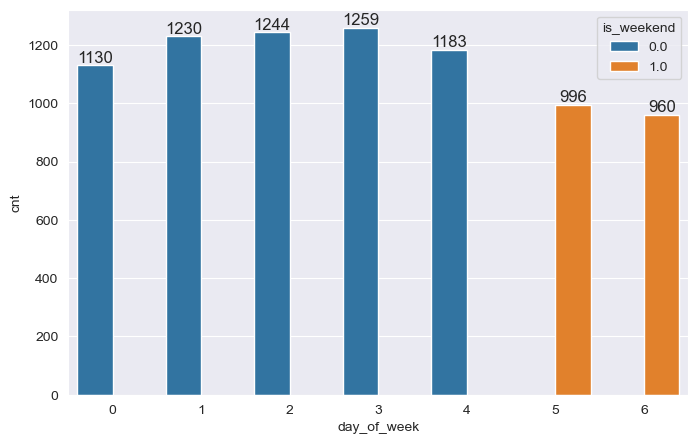

In [ ]:
plt.figure(figsize = (8,5))

ax = sns.barplot(x = "day_of_week", 
                 y = "cnt", 
                 data = df, 
                 hue = 'is_weekend',
                 ci = None)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=12);

<Axes: xlabel='day_of_week', ylabel='cnt'>

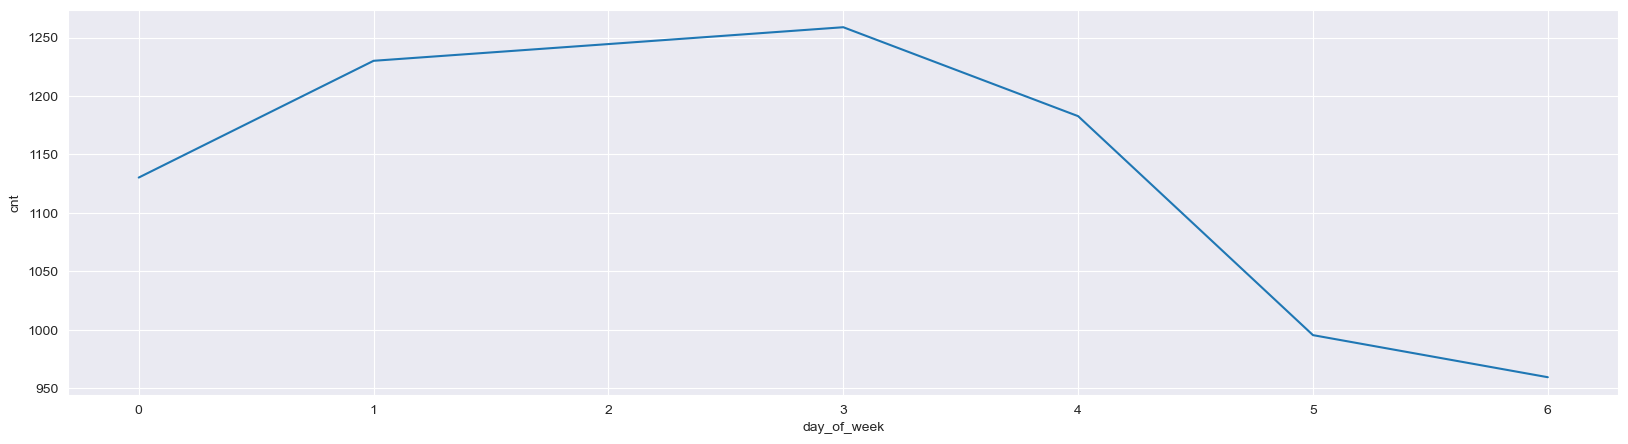

In [ ]:
plt.figure(figsize = (20,5))

sns.lineplot(x = df.day_of_week, 
             y = df.cnt,
             ci = None)

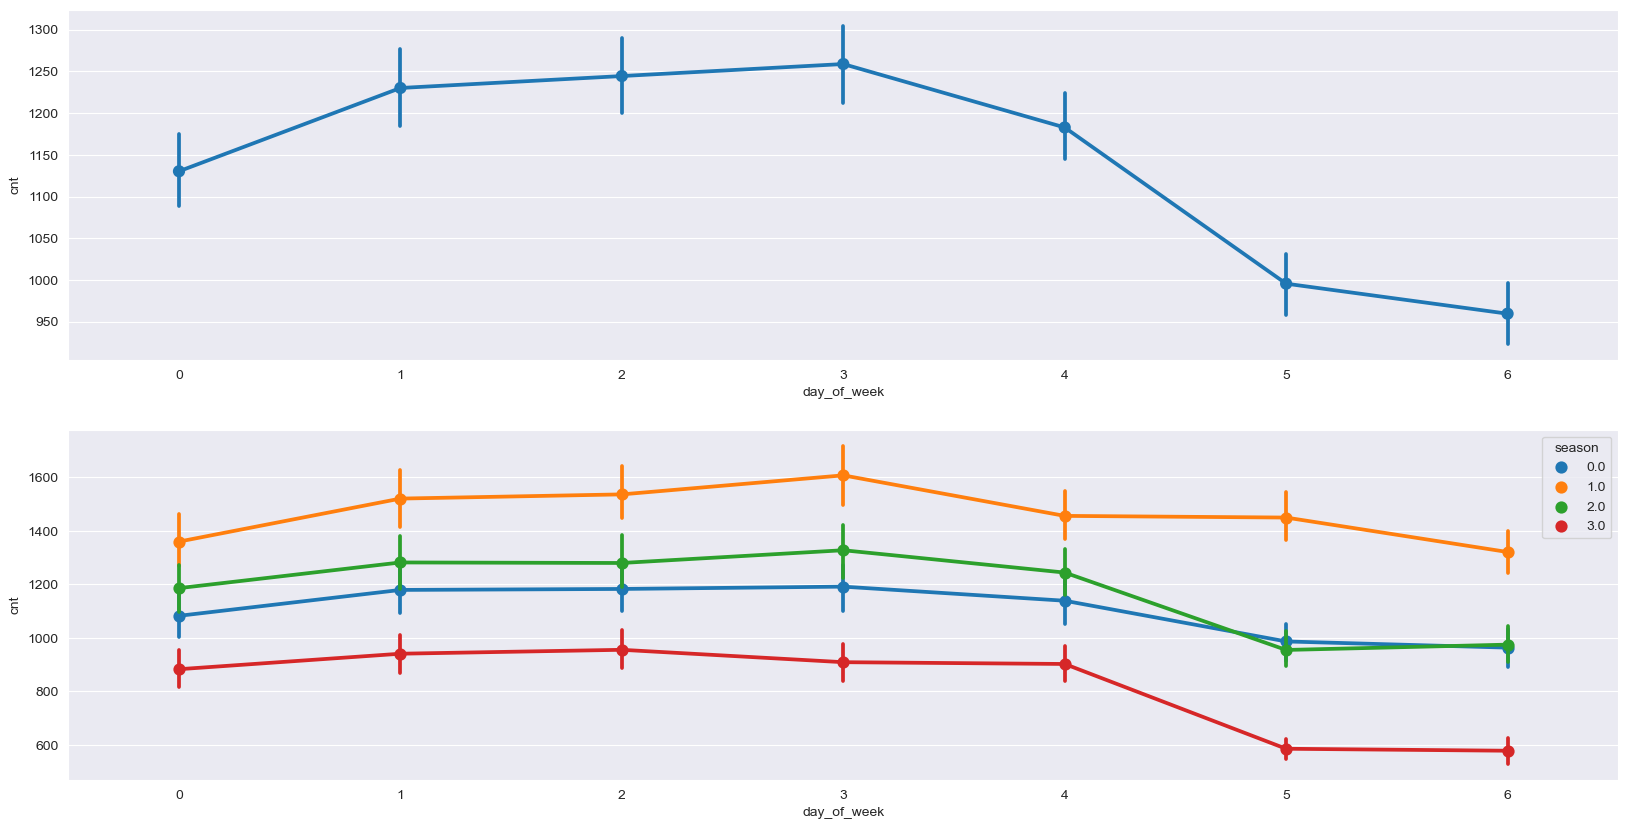

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 2) 
fig.set_size_inches(20, 10)  

sns.pointplot(data = df, 
              x = 'day_of_week', 
              y = 'cnt', 
              ax = ax1)
sns.pointplot(x = "day_of_week", 
              y = "cnt", 
              data = df, 
              hue = "season", 
              ax = ax2)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. PLOTTING BIKE SHARES BY DAY OF MONTH</span>

In [ ]:
df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))

day_of_month
1     1077
2     1088
3     1128
4     1144
5     1141
6     1211
7     1194
8     1223
9     1261
10    1157
11    1204
12    1167
13    1139
14    1124
15    1176
16    1141
17    1182
18    1179
19    1153
20    1116
21    1126
22    1128
23    1174
24    1054
25    1191
26    1082
27    1131
28    1063
29    1080
30    1156
31     968
Name: cnt, dtype: int64

In [ ]:
dom = pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))).rename_axis('dom')
dom.T

dom,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


dom,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


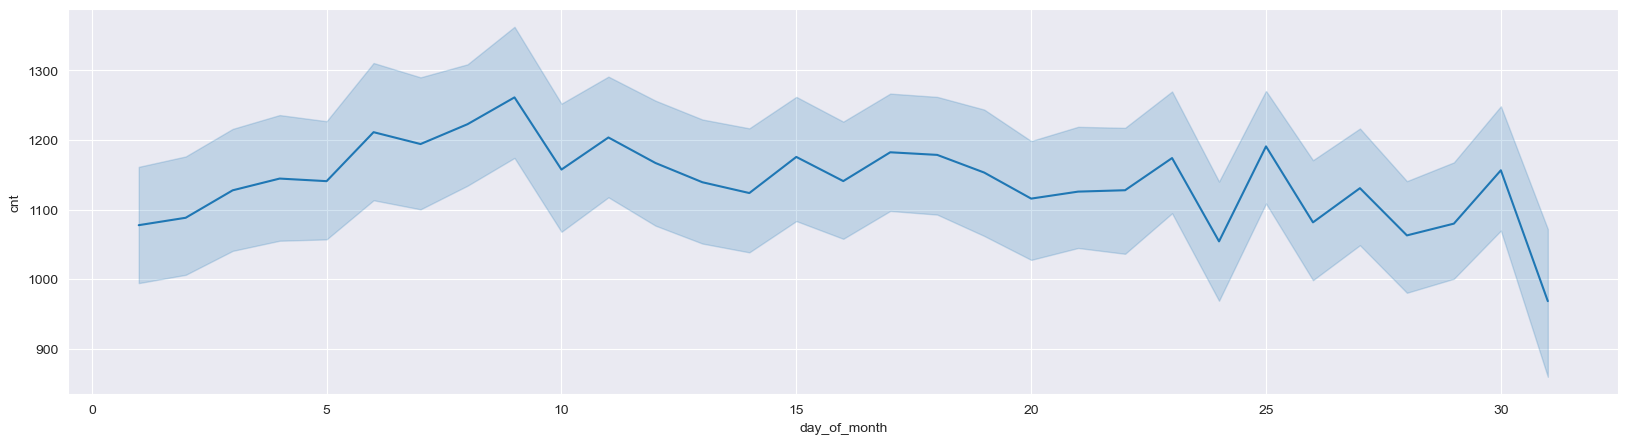

In [ ]:
plt.figure(figsize = (20, 5))

ax = sns.lineplot(x = 'day_of_month', 
                  y = 'cnt', 
                  data = df)
pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))).rename_axis('dom').T

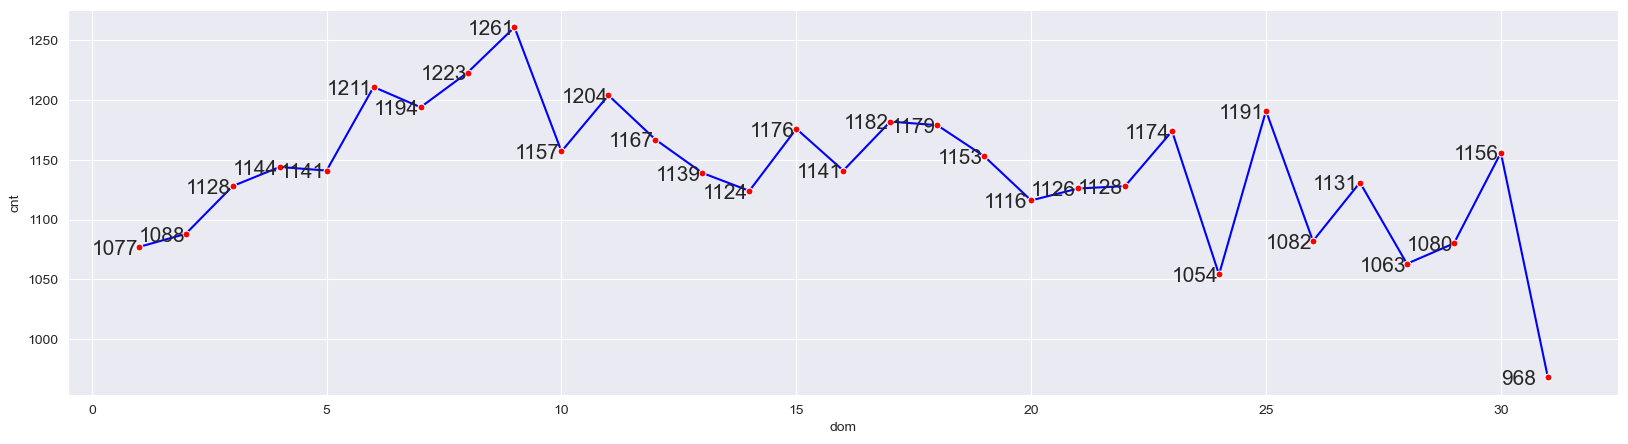

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x=dom.index, y=dom["cnt"], 
                  color='blue', linestyle='-', 
                  marker='o', markerfacecolor='red', 
                  markersize=5)

for index, value in enumerate(dom.cnt.values):
    plt.text(index, value, str(value), 
             va="center_baseline", ha="left", fontsize=15)


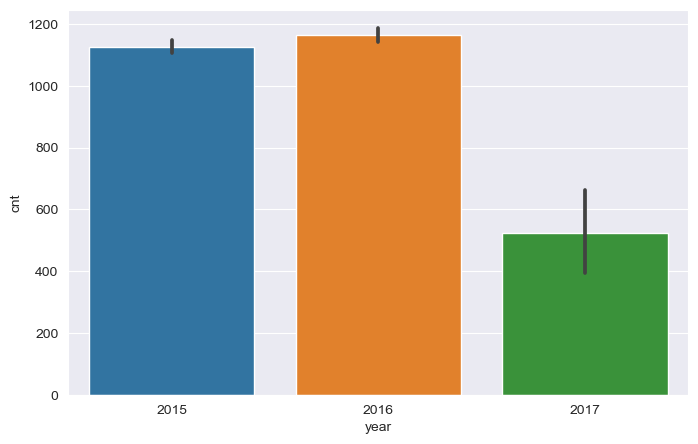

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = "year", 
            y = "cnt", 
            data = df);


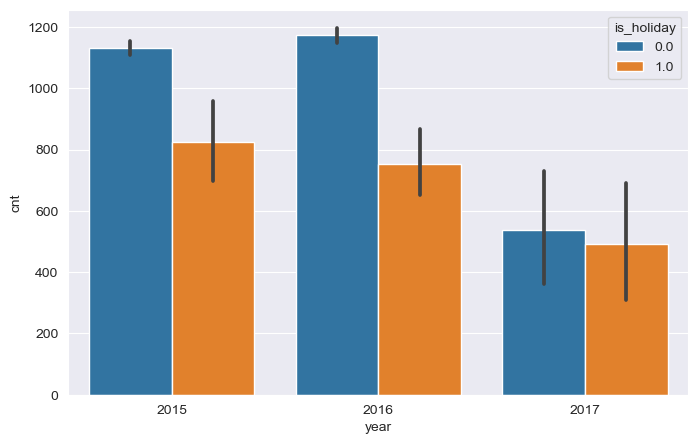

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(x = df.year, y = df.cnt, hue = df.is_holiday);

<div class="alert alert-warning alert-info">
<span style=" color:red"> 15. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

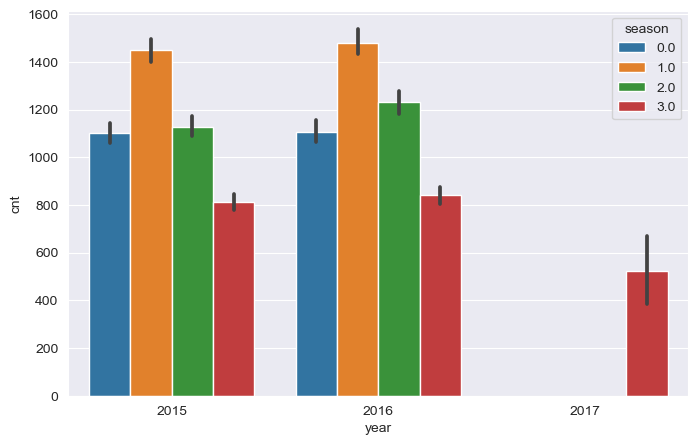

In [ ]:
plt.figure(figsize = (8,5))

sns.barplot(x = df.year, 
            y = df.cnt, 
            hue = df.season);

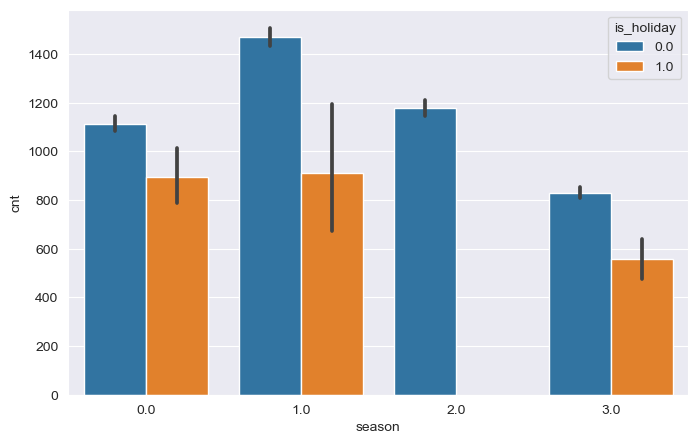

In [ ]:
plt.figure(figsize = (8,5))

sns.barplot(x = df.season, 
            y = df.cnt, 
            hue = df.is_holiday);

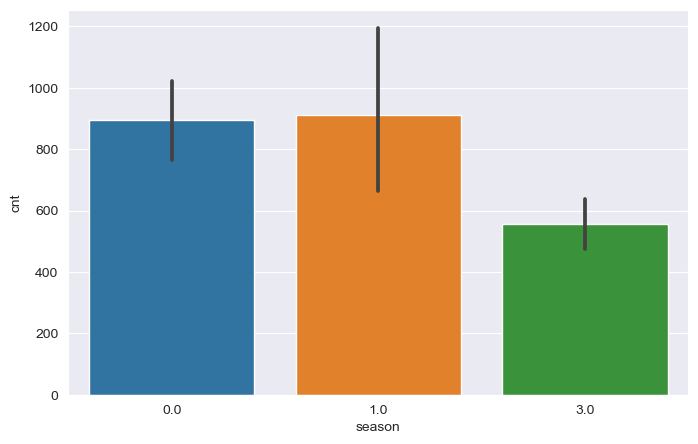

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = "season", 
            y = "cnt", 
            data = df[df["is_holiday"] == 1]);

In [ ]:
round(df['is_weekend'].value_counts(normalize = True) * 100, 1)

0.0    71.5
1.0    28.5
Name: is_weekend, dtype: float64

<div class="alert alert-warning alert-info">
<span style=" color:red">14. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [ ]:
df.is_weekend.value_counts().values

array([12444,  4970])

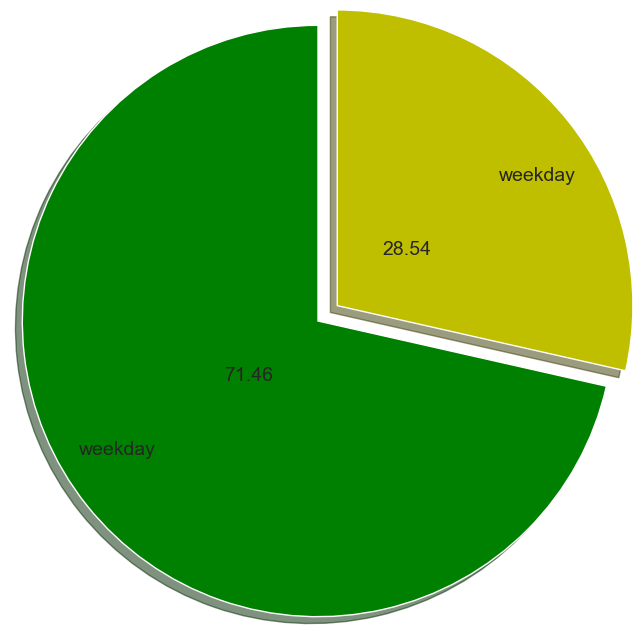

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))

ax.pie(x = df.is_weekend.value_counts().values,
       labels = ["weekday", "weekday"],
       explode = [0, 0.1],
       colors = ["g", "y"],
       autopct = "%.2f",
       pctdistance=0.3,
       shadow = True,
       labeldistance = 0.7,
       startangle = 90,
       radius = 1.2,
       textprops = {'fontsize': 14})
plt.show()

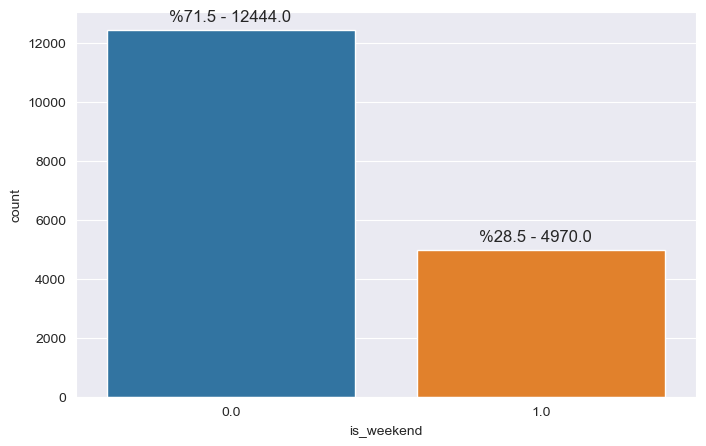

In [ ]:
plt.figure(figsize=(8,5))

ax = sns.countplot(x = 'is_weekend', 
                   data = df)

for bar in ax.patches:
    ax.annotate("%" + str(round(100*bar.get_height()/len(df), 1)) + ' - ' + str(bar.get_height() ), 
                (bar.get_x()+0.2, bar.get_height()+300),
                size=12)

<Axes: xlabel='weather_code', ylabel='count'>

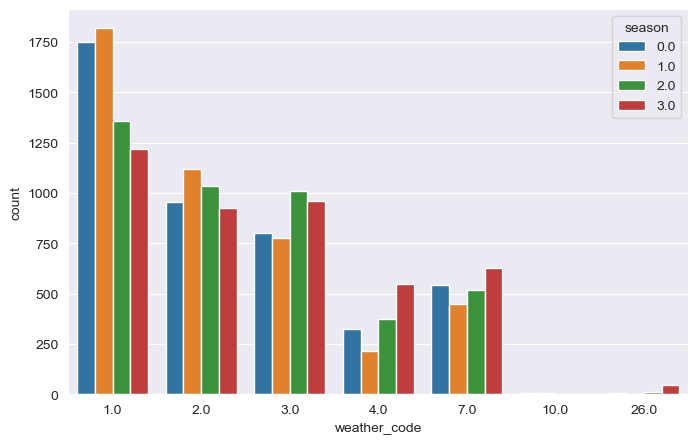

In [ ]:

plt.figure(figsize = (8,5))
sns.countplot(x = "weather_code", 
              hue = "season", 
              data = df)

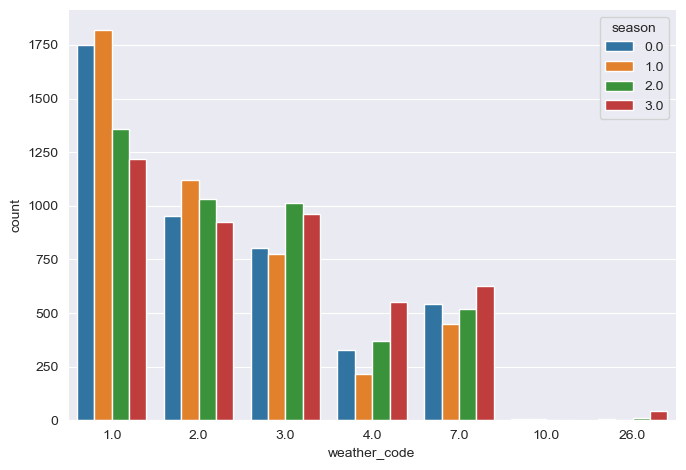

In [ ]:

sns.catplot(x = "weather_code", 
            hue = "season", 
            data = df, 
            kind = 'count', 
            height = 4.8, 
            aspect = 1.45, 
            legend_out = False);

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Plot the distribution of weather code by seasons
</span>

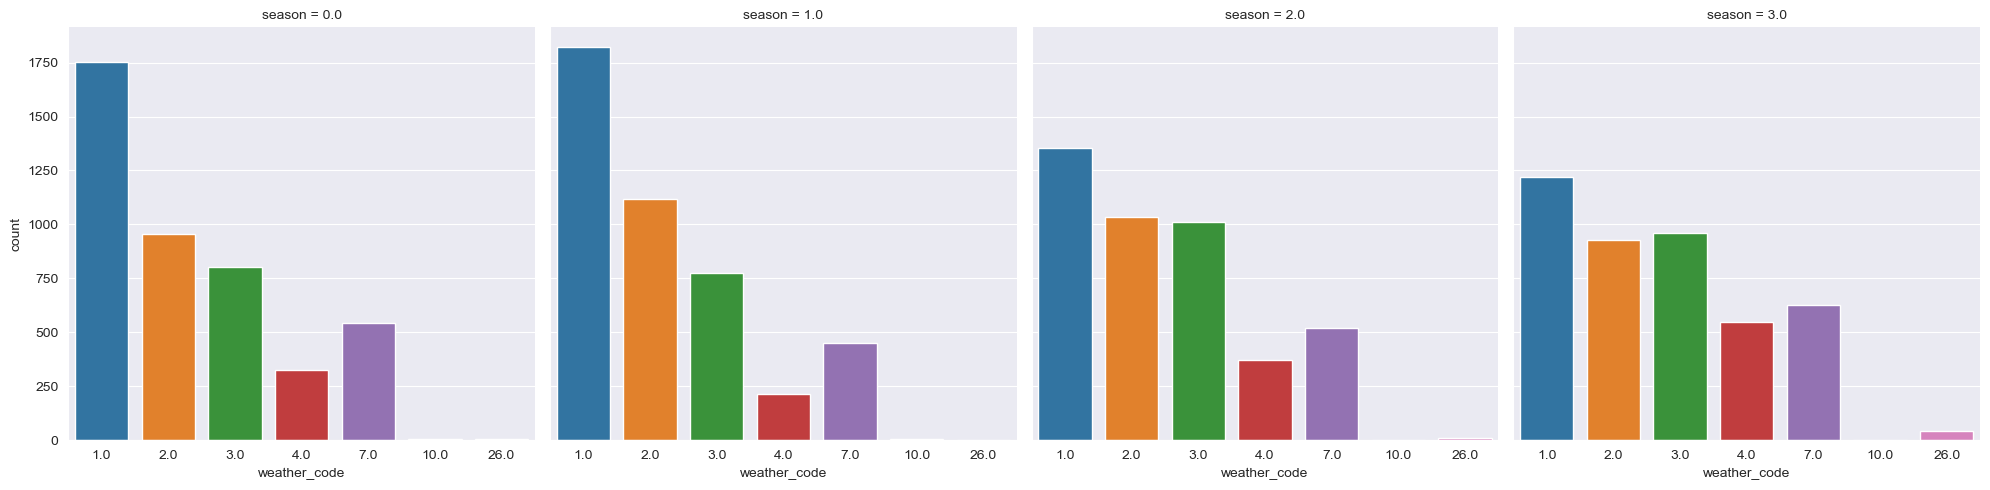

In [ ]:
g = sns.catplot(x = "weather_code", 
                col = "season", 
                data = df, 
                kind = 'count');

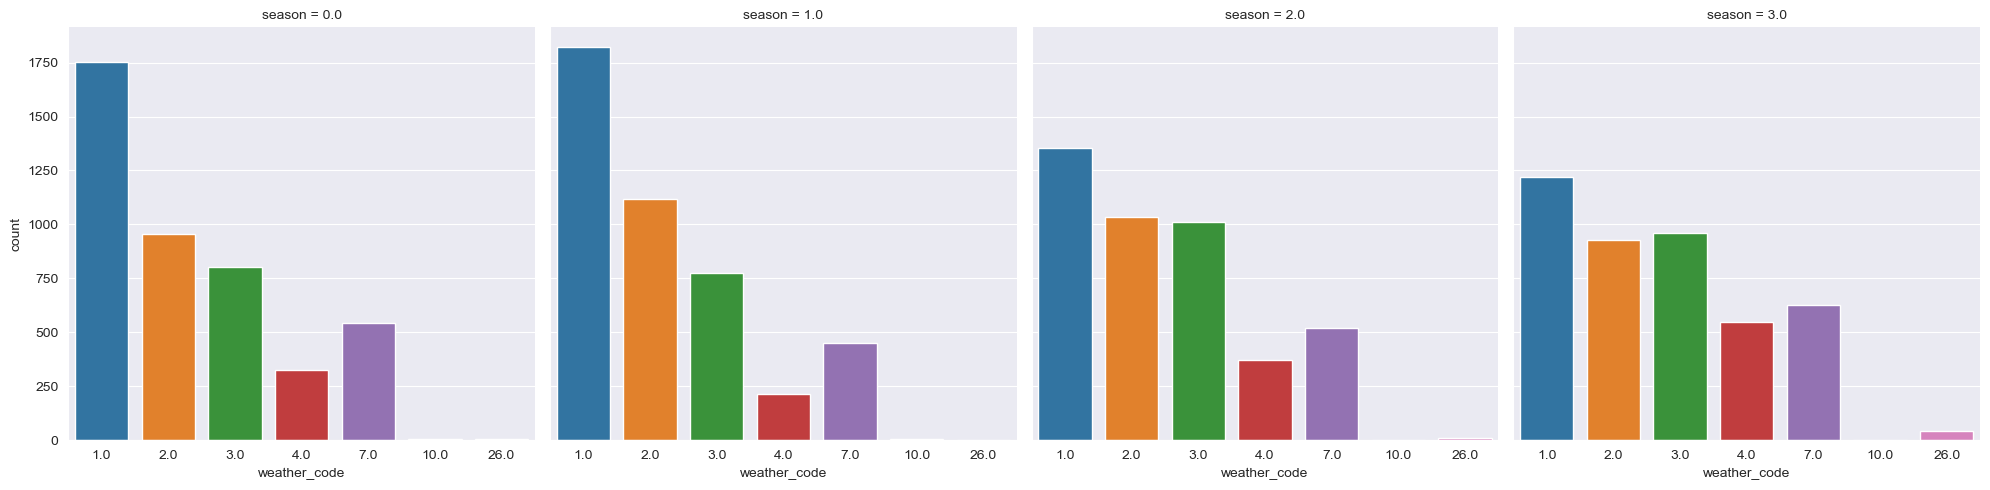

In [ ]:
sns.catplot(x = "weather_code", 
            col = "season", 
            col_wrap = 4, 
            data = df, 
            kind = "count");

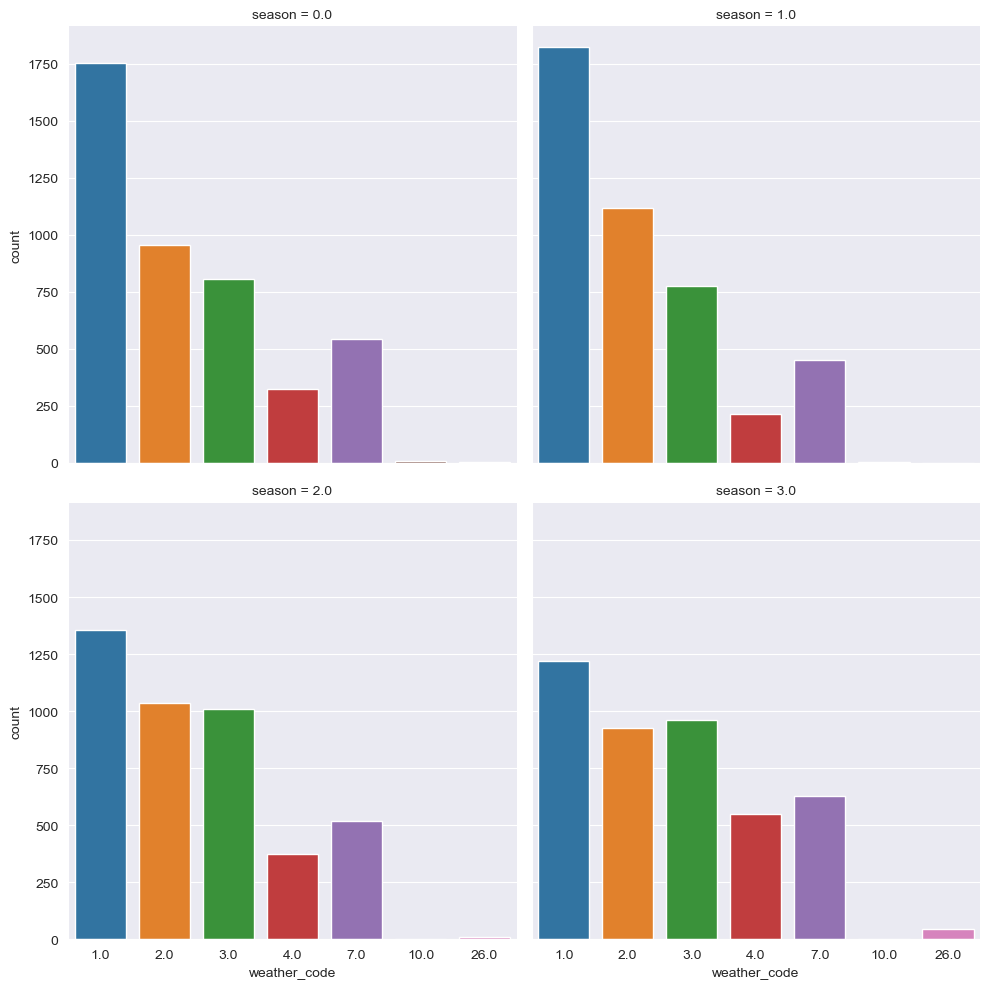

In [ ]:
sns.catplot(x = "weather_code", 
            col = "season", 
            col_wrap = 2, 
            data = df, 
            kind = "count");

<div class="alert alert-warning alert-info">
<span style=" color:red">16. PLOTTING BIKE SHARES OVER TIME BY USING PIVOT TABLE</span>

In [ ]:
df.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2


In [ ]:
df_pivot = df.pivot_table(index = "year", columns = "month", values = "cnt")
df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,814.663189,810.125186,941.723951,1156.581363,1203.512097,1441.076709,1514.441892,1389.719086,1255.243319,1175.334239,952.646976,814.645946
2016,782.954301,861.787791,900.585734,1069.325452,1346.686828,1324.649645,1572.910931,1536.910811,1462.106881,1259.362046,978.941586,876.220430
2017,523.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


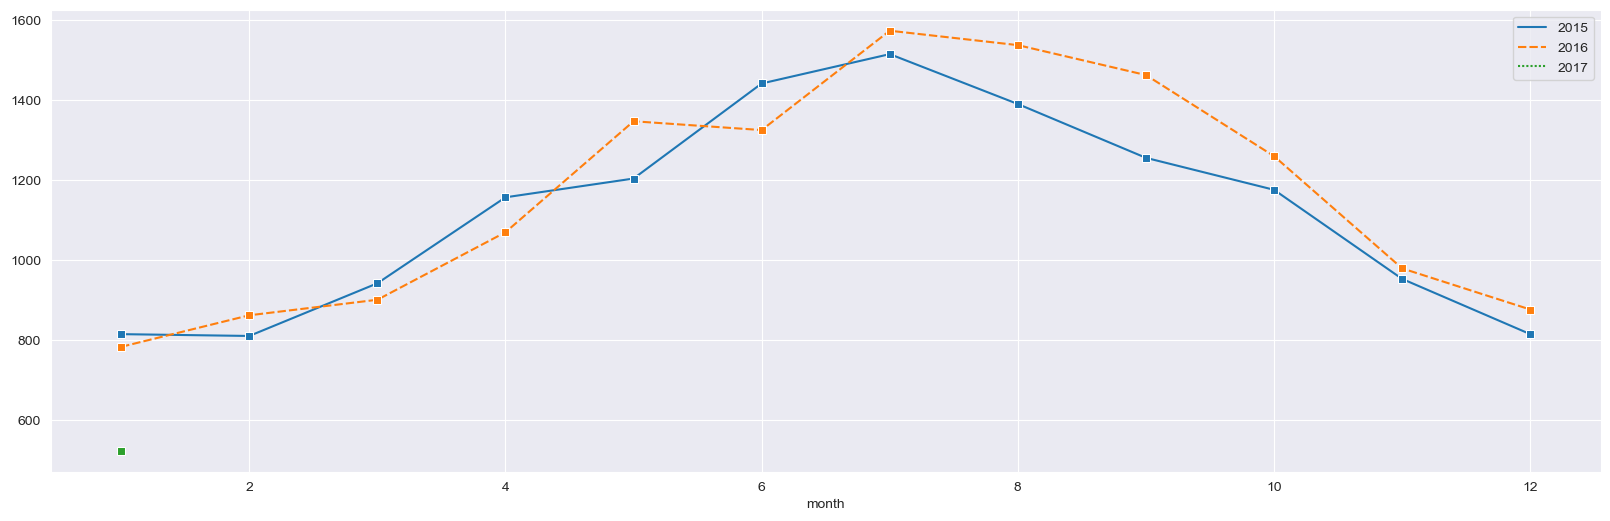

In [ ]:
plt.figure(figsize = (20, 6))

sns.lineplot(data = df_pivot.T, 
             marker = "s")
plt.legend(loc = 1);

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

<ul>
  <li>People tend to share bcycles as the weather is not foggy, snowy and rainy.</li>
  <li>Good weather increases the amount of shared bcycles.</li>
  <li>The weekdays has almost no effect on the amount of the bcycles shared.</li>
  <li>The amount of the bcycles shared is mainly affected by the hours of the days which are early in the morning and evening times.</li>
  <li>We may conclude that people tend to get bcycles before or after work..</li>
  <li>Seasons has been changing the preference. cold seasons make people choosing less than warm seasons.</li>
  <li>All in all, """people mainly prefer the bycles to get to work""" accordingly with the weather and tempreature.</li>
  <li>The matters that affect temperature and weather affect the likeliness people use bcycles to get to work.</li>
</ul>

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

![yaz%C4%B1.webp](attachment:yaz%C4%B1.webp)